# Credit EDA

In [164]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# Reading dataset from local

df = pd.read_csv('application_data.csv')

In [166]:
# Determining the shape of the datset

df.shape

(258222, 122)

In [167]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol=df.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)


64

So, there are 64 columns having null values greater than 30% in the dataset

In [168]:
# Removing those 64 columns
threshold = 0.3
emptycol = [col for col in df.columns if (df[col].isnull().sum() / len(df) >= threshold)]
df.drop(labels=emptycol, axis=1, inplace=True)
print(len(emptycol))

50


In [169]:
# Checking the columns having less null percentage
df.isnull().sum()/len(df)*100

SK_ID_CURR                    0.00
TARGET                        0.00
NAME_CONTRACT_TYPE            0.00
CODE_GENDER                   0.00
FLAG_OWN_CAR                  0.00
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY    13.52
AMT_REQ_CREDIT_BUREAU_WEEK   13.52
AMT_REQ_CREDIT_BUREAU_MON    13.52
AMT_REQ_CREDIT_BUREAU_QRT    13.52
AMT_REQ_CREDIT_BUREAU_YEAR   13.52
Length: 72, dtype: float64

So, 'AMT_GOODS_PRICE' column is having very few null values rows. Hence let's try to impute the missing values

Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean,
Hence Median comes to rescue for this and we will fill those missing banks with median value

In [170]:
# Filling missing values with median

values=df['AMT_GOODS_PRICE'].median()

df.loc[df['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=values

In [171]:
# Searching for the column for null values

df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     34912
AMT_REQ_CREDIT_BUREAU_WEEK    34912
AMT_REQ_CREDIT_BUREAU_MON     34912
AMT_REQ_CREDIT_BUREAU_QRT     34912
AMT_REQ_CREDIT_BUREAU_YEAR    34912
Length: 72, dtype: int64

In [172]:
# Removing rows having null values greater than or equal to 30%

emptyrow=df.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df)].index)
df.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [173]:
# We will remove unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [174]:
# let's find these categorical columns having these 'XNA' values

# For Gender column

df[df['CODE_GENDER']=='XNA'].shape

(4, 42)

In [175]:
# For Organization column

df[df['ORGANIZATION_TYPE']=='XNA'].shape

(46569, 42)

So, there are 4 rows from Gender column and 46569 rows from Organization type column

In [176]:
# Describing the Gender column to check the number of females and males

df['CODE_GENDER'].value_counts()

F      170062
M       88156
XNA         4
Name: CODE_GENDER, dtype: int64

Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

In [177]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    170066
M     88156
Name: CODE_GENDER, dtype: int64

In [178]:
# Describing the organization type column

df['ORGANIZATION_TYPE'].describe()


count                     258221
unique                        58
top       Business Entity Type 3
freq                       57126
Name: ORGANIZATION_TYPE, dtype: object

So, for column 'ORGANIZATION_TYPE', we have total count of 258211 rows of which 46569 rows are having 'XNA' values. Which means 18% of the column is having this values.
Hence if we drop the rows of total 46569, will not have any major impact on our dataset.

Percentage=( 46,569 /259,211) * 100 ≈17.96%

In [120]:
# Hence, dropping the rows of total 46569 have 'XNA' values in the organization type column

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 42)

In [179]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)
df.head(5)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,"-3,648.00","-2,120.00",WEDNESDAY,10.00,0.00,0.00,0.00,0.00,0.00,0.00,Business Entity Type 3,0.26,0.14,2.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,"-1,186.00",-291.00,MONDAY,11.00,0.00,0.00,0.00,0.00,0.00,0.00,School,0.62,NaN,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,"-4,260.00","-2,531.00",MONDAY,9.00,0.00,0.00,0.00,0.00,0.00,0.00,Government,0.56,0.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,"135,000.00","312,682.50","29,686.50","297,000.00",Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,"-9,833.00","-2,437.00",WEDNESDAY,17.00,0.00,0.00,0.00,0.00,0.00,0.00,Business Entity Type 3,0.65,NaN,2.00,0.00,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,"121,500.00","513,000.00","21,865.50","513,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,"-4,311.00","-3,458.00",THURSDAY,11.00,0.00,0.00,0.00,0.00,1.00,1.00,Religion,0.32,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


------------------------------------------------

**Additional insights**

Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [180]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [181]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [182]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]


In [184]:
# Calculating Imbalance percentage

# Since the majority is target0 and minority is target1

round(len(target0_df)/len(target1_df),2)

11.34

The Imbalance ratio is 11.34

**Univariate analysis for categories**

**Now, doing Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)**

In [187]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma')

    plt.show()

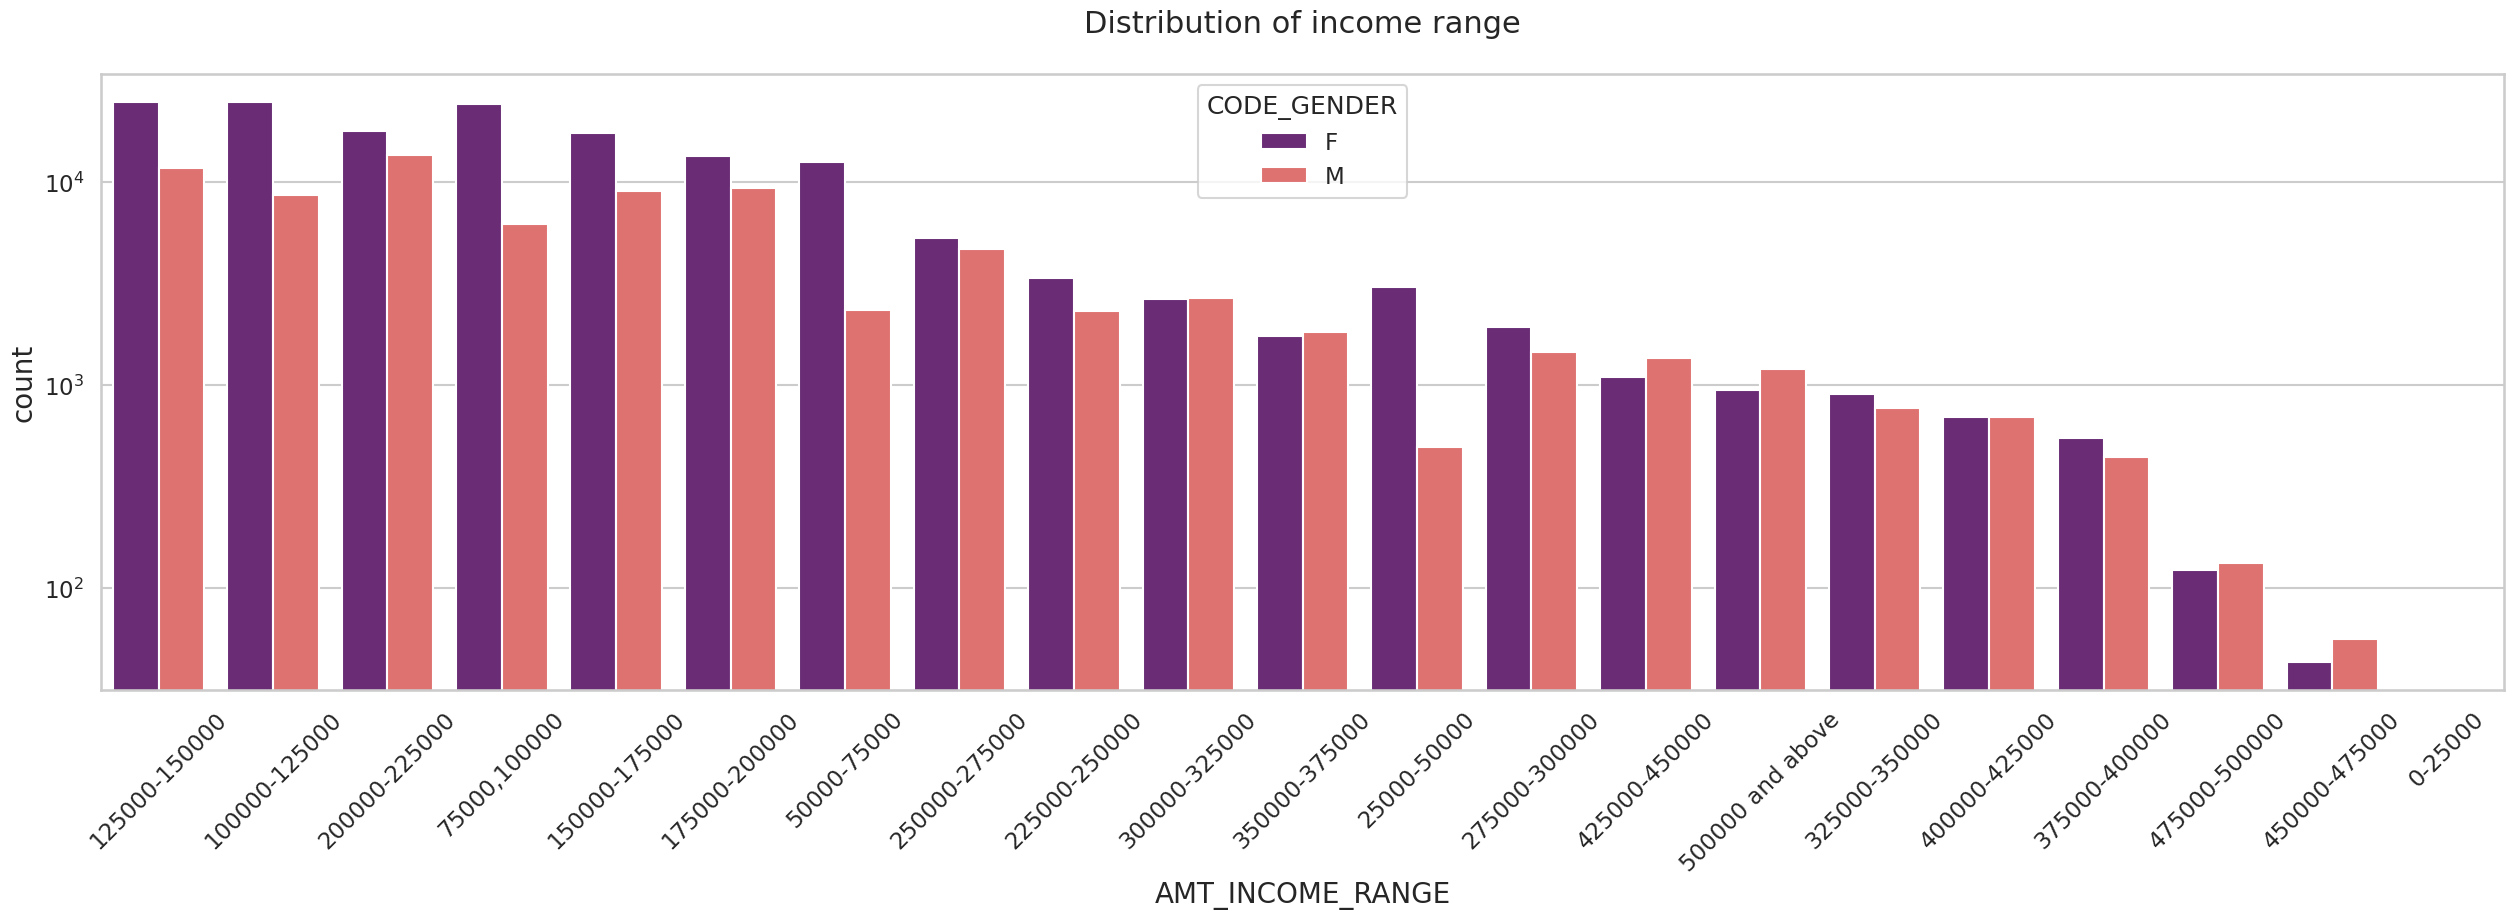

In [186]:
# PLotting for income range

uniplot(target0_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')


Points to be concluded from the above graph.

1. Female counts are higher than male.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that females are more than male in having credits for that range.
4. Very less count for income range 400000 and above.

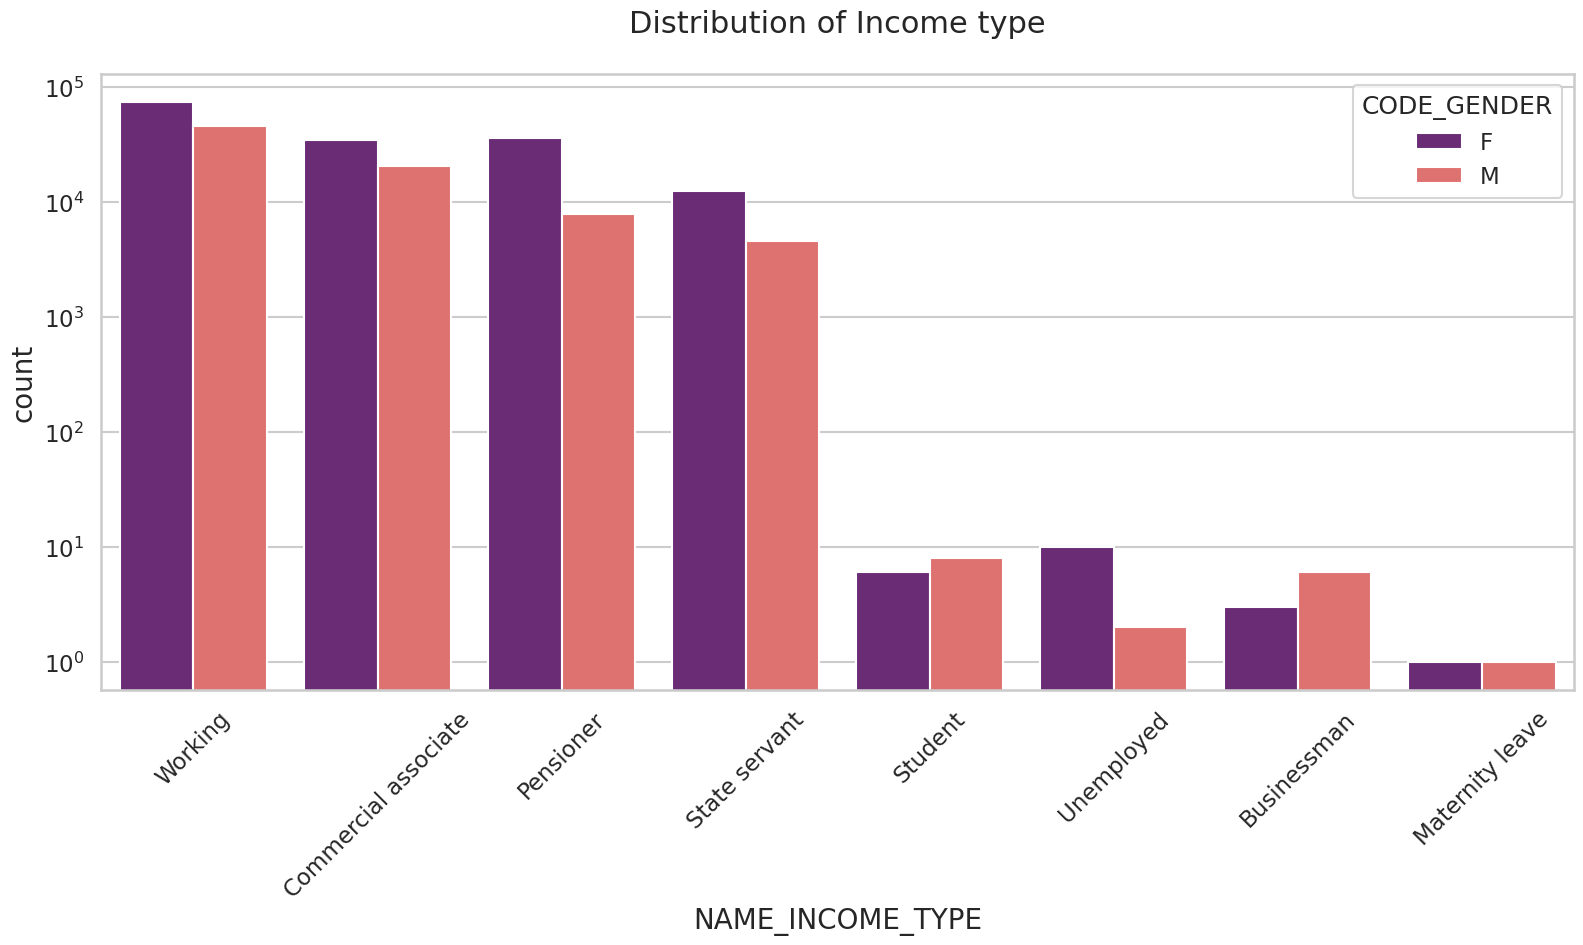

In [190]:
# Plotting for Income type

uniplot(target0_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

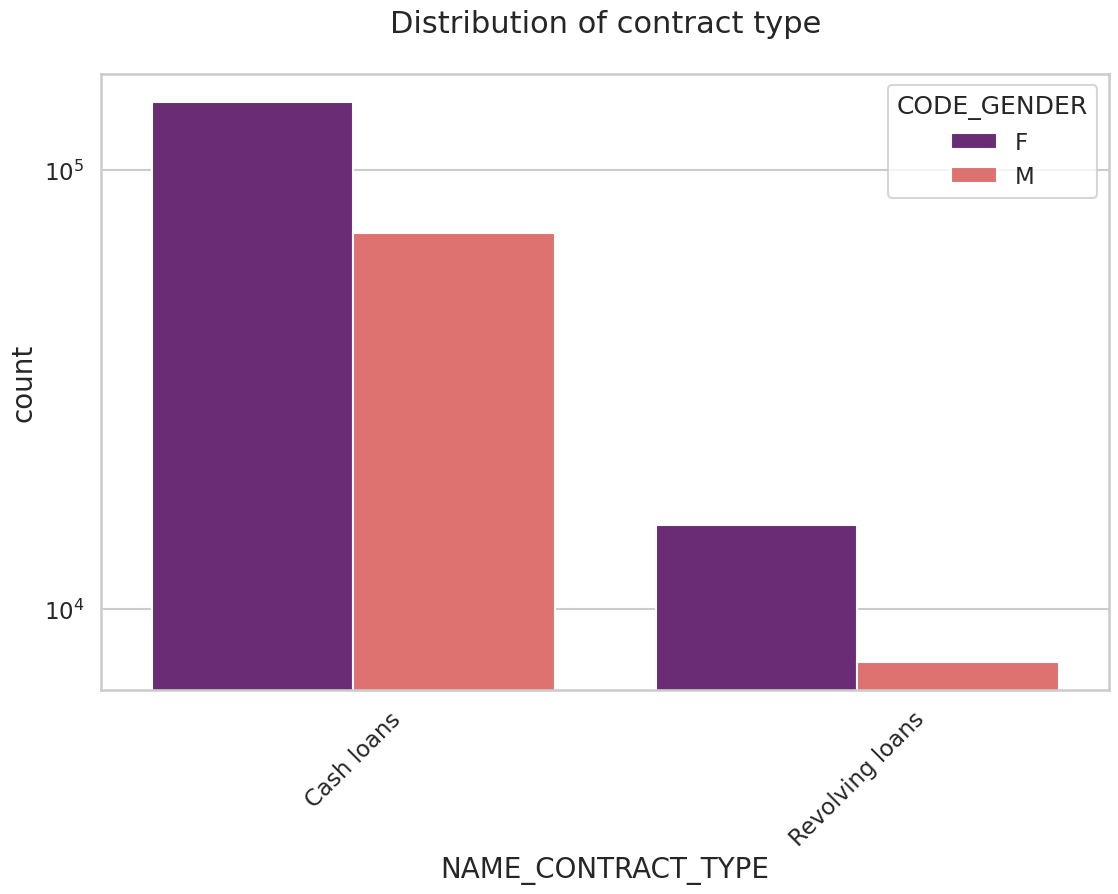

In [191]:
# Plotting for Contract type

uniplot(target0_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.

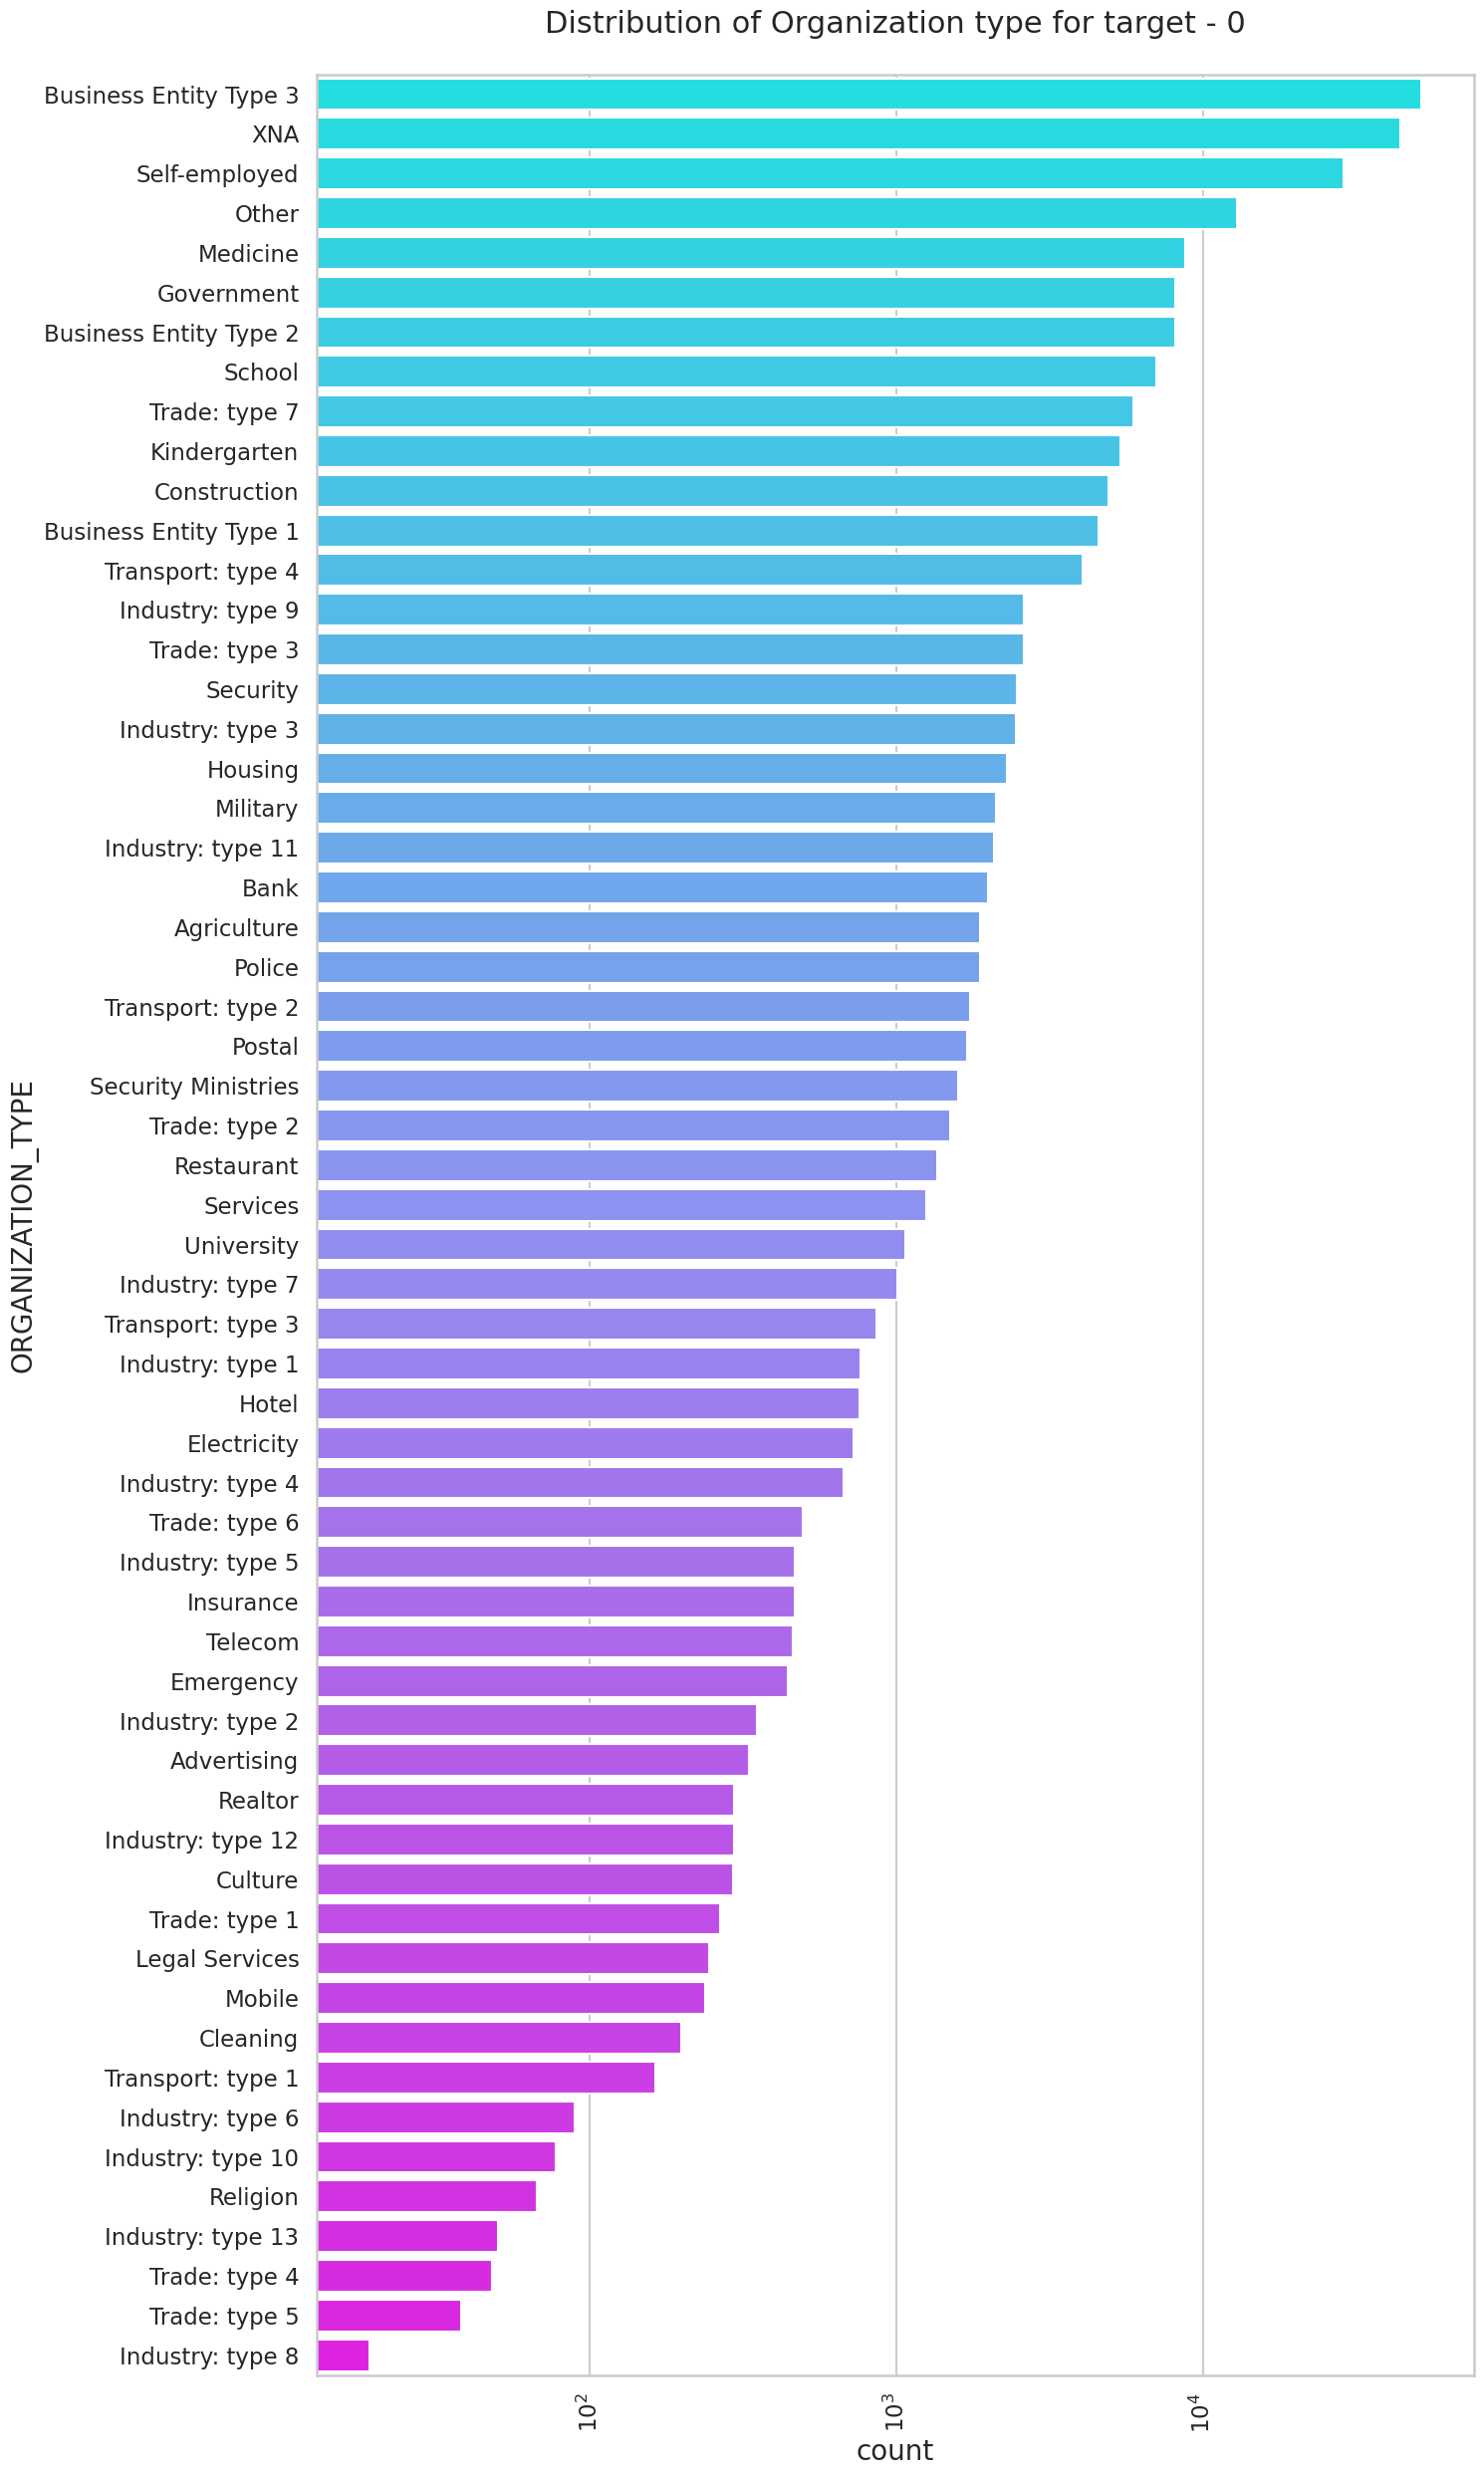

In [192]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Points to be concluded from the above graph.

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’,
   ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.


**Now, doing Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)**

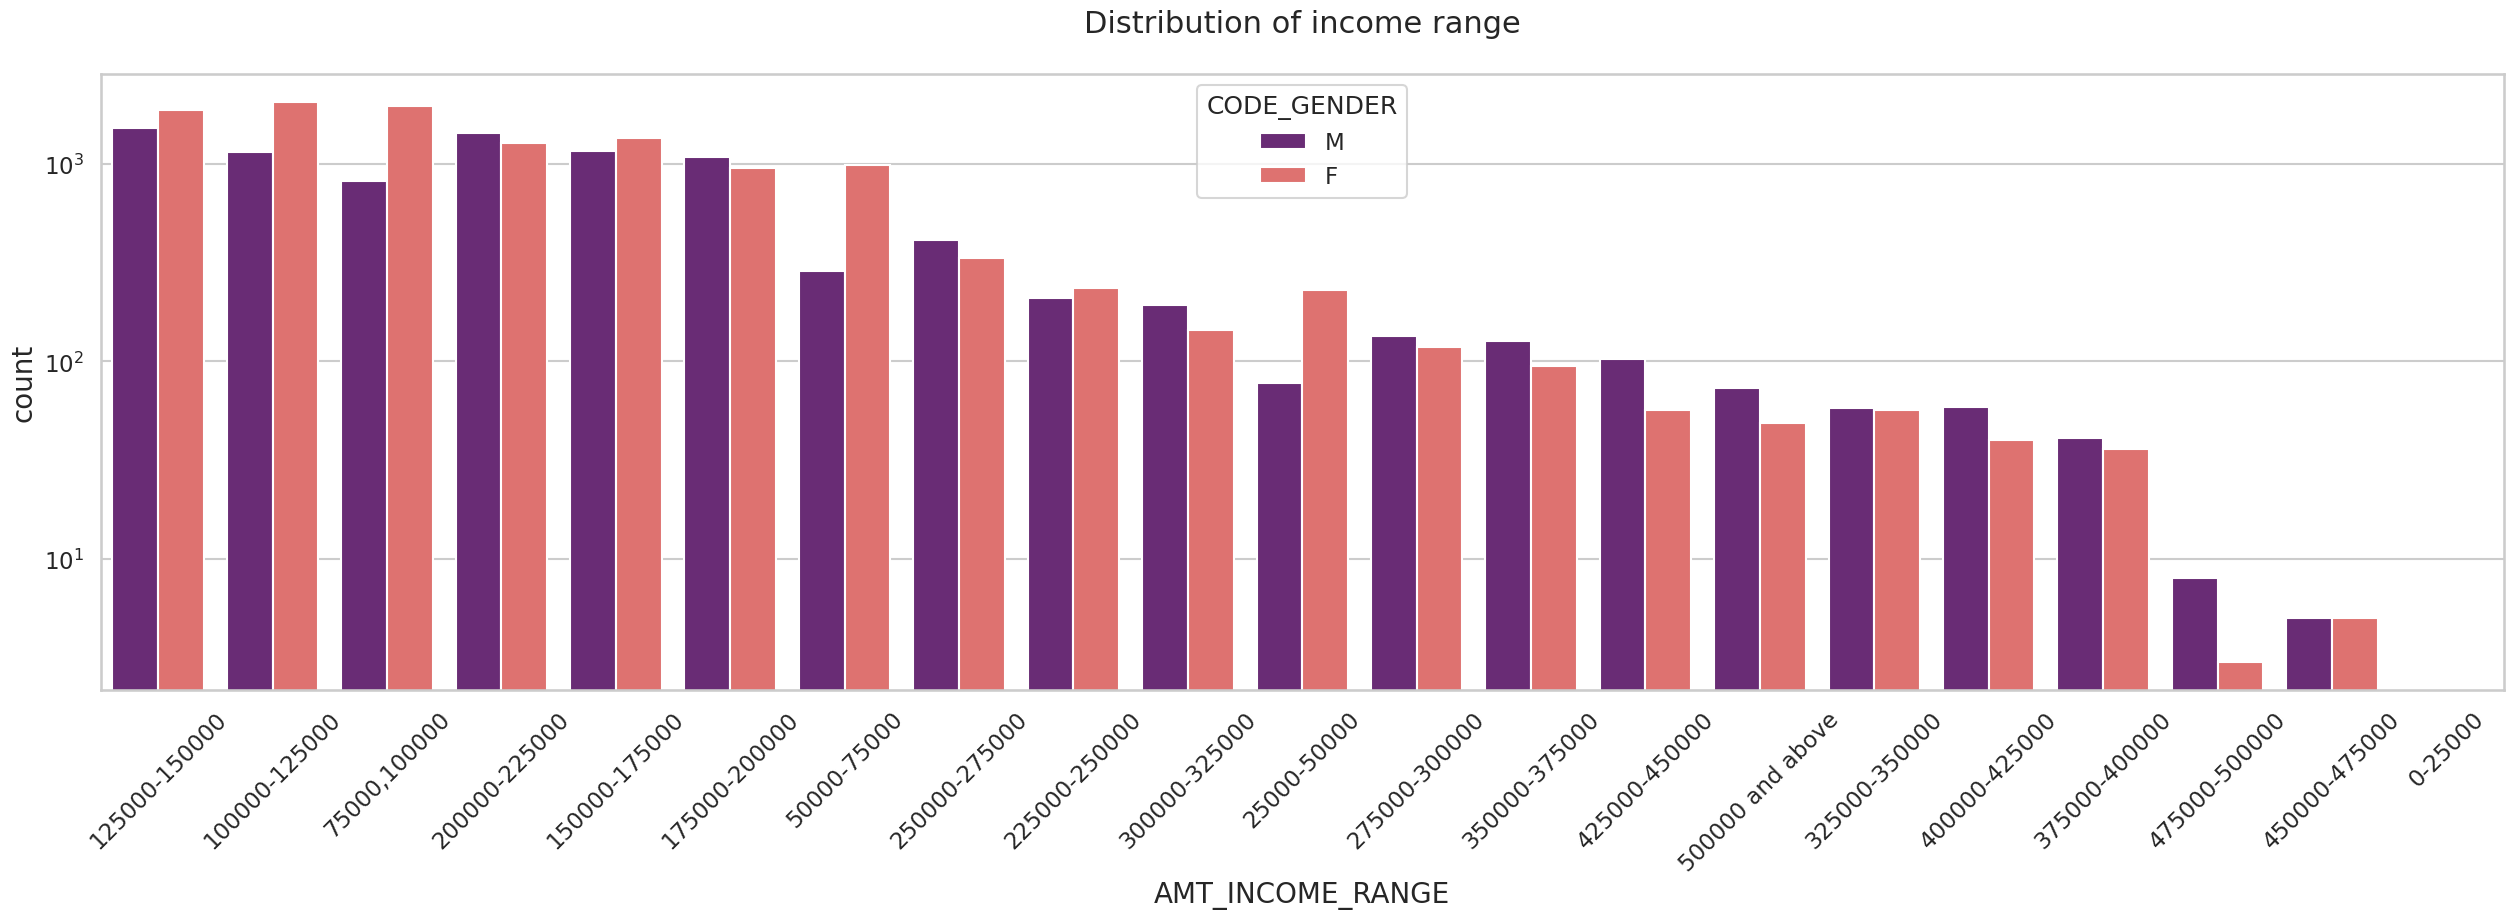

In [193]:
# PLotting for income range

uniplot(target1_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. Male counts are higher than female.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that males are more than female in having credits for that range.
4. Very less count for income range 400000 and above.


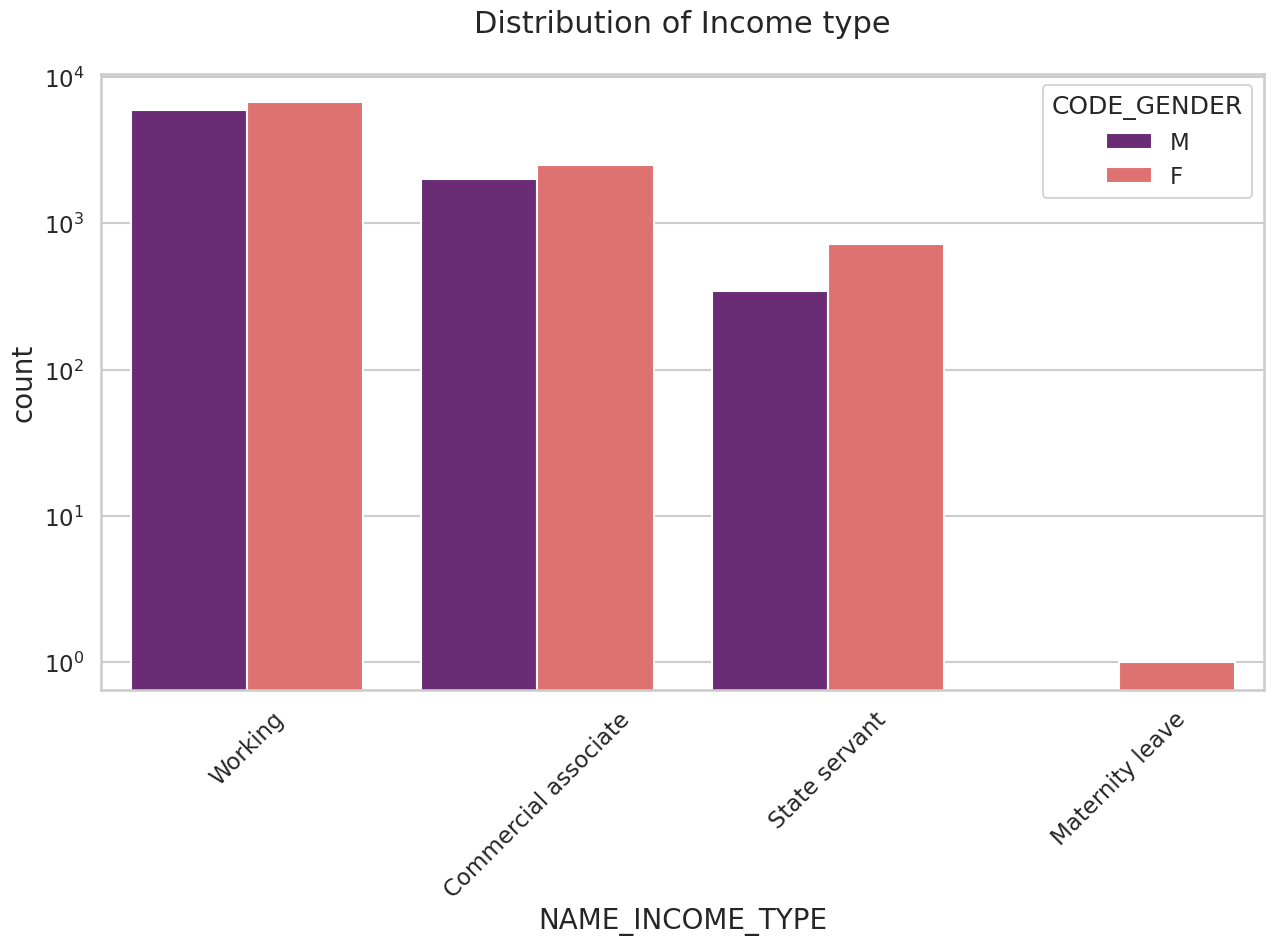

In [132]:
# Plotting for Income type

uniplot(target1_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e.   ‘Maternity leave.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type  ‘Maternity leave’.
4. For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

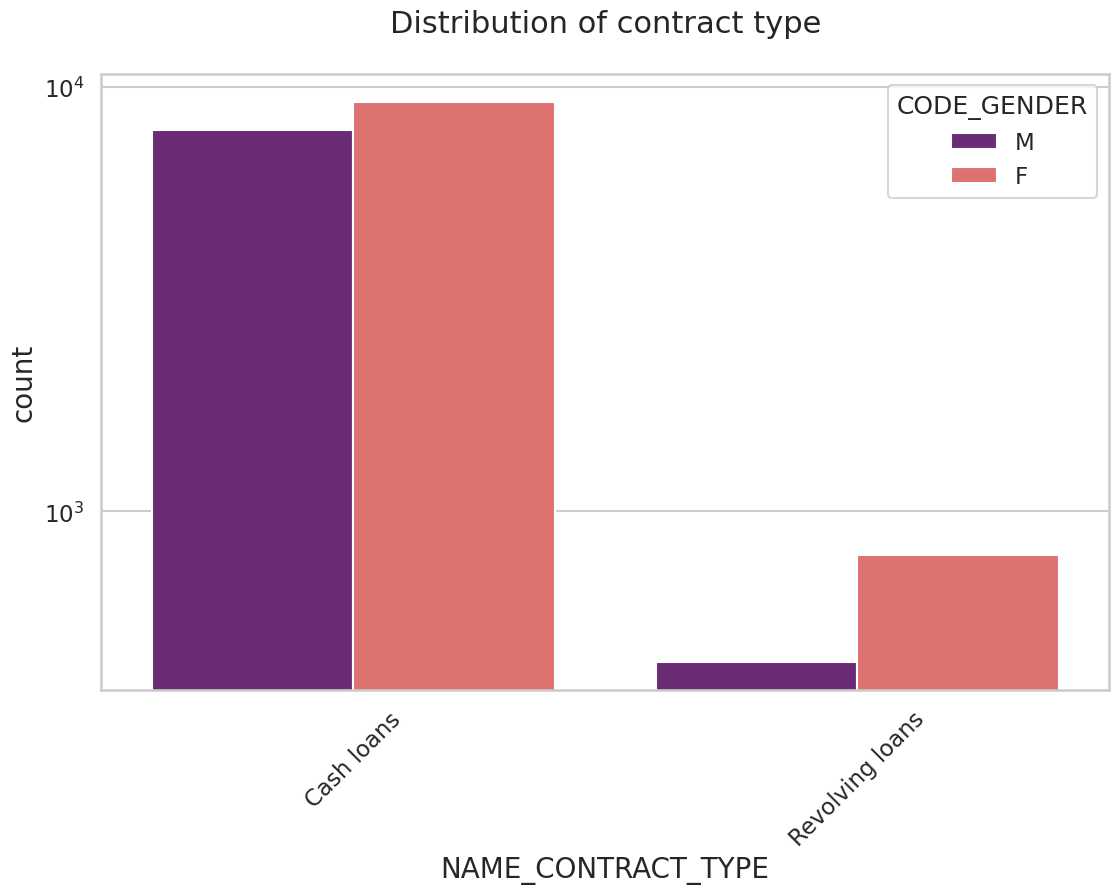

In [133]:
# Plotting for Contract type

uniplot(target1_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.
3. For type 1 : there is only Female Revolving loans.

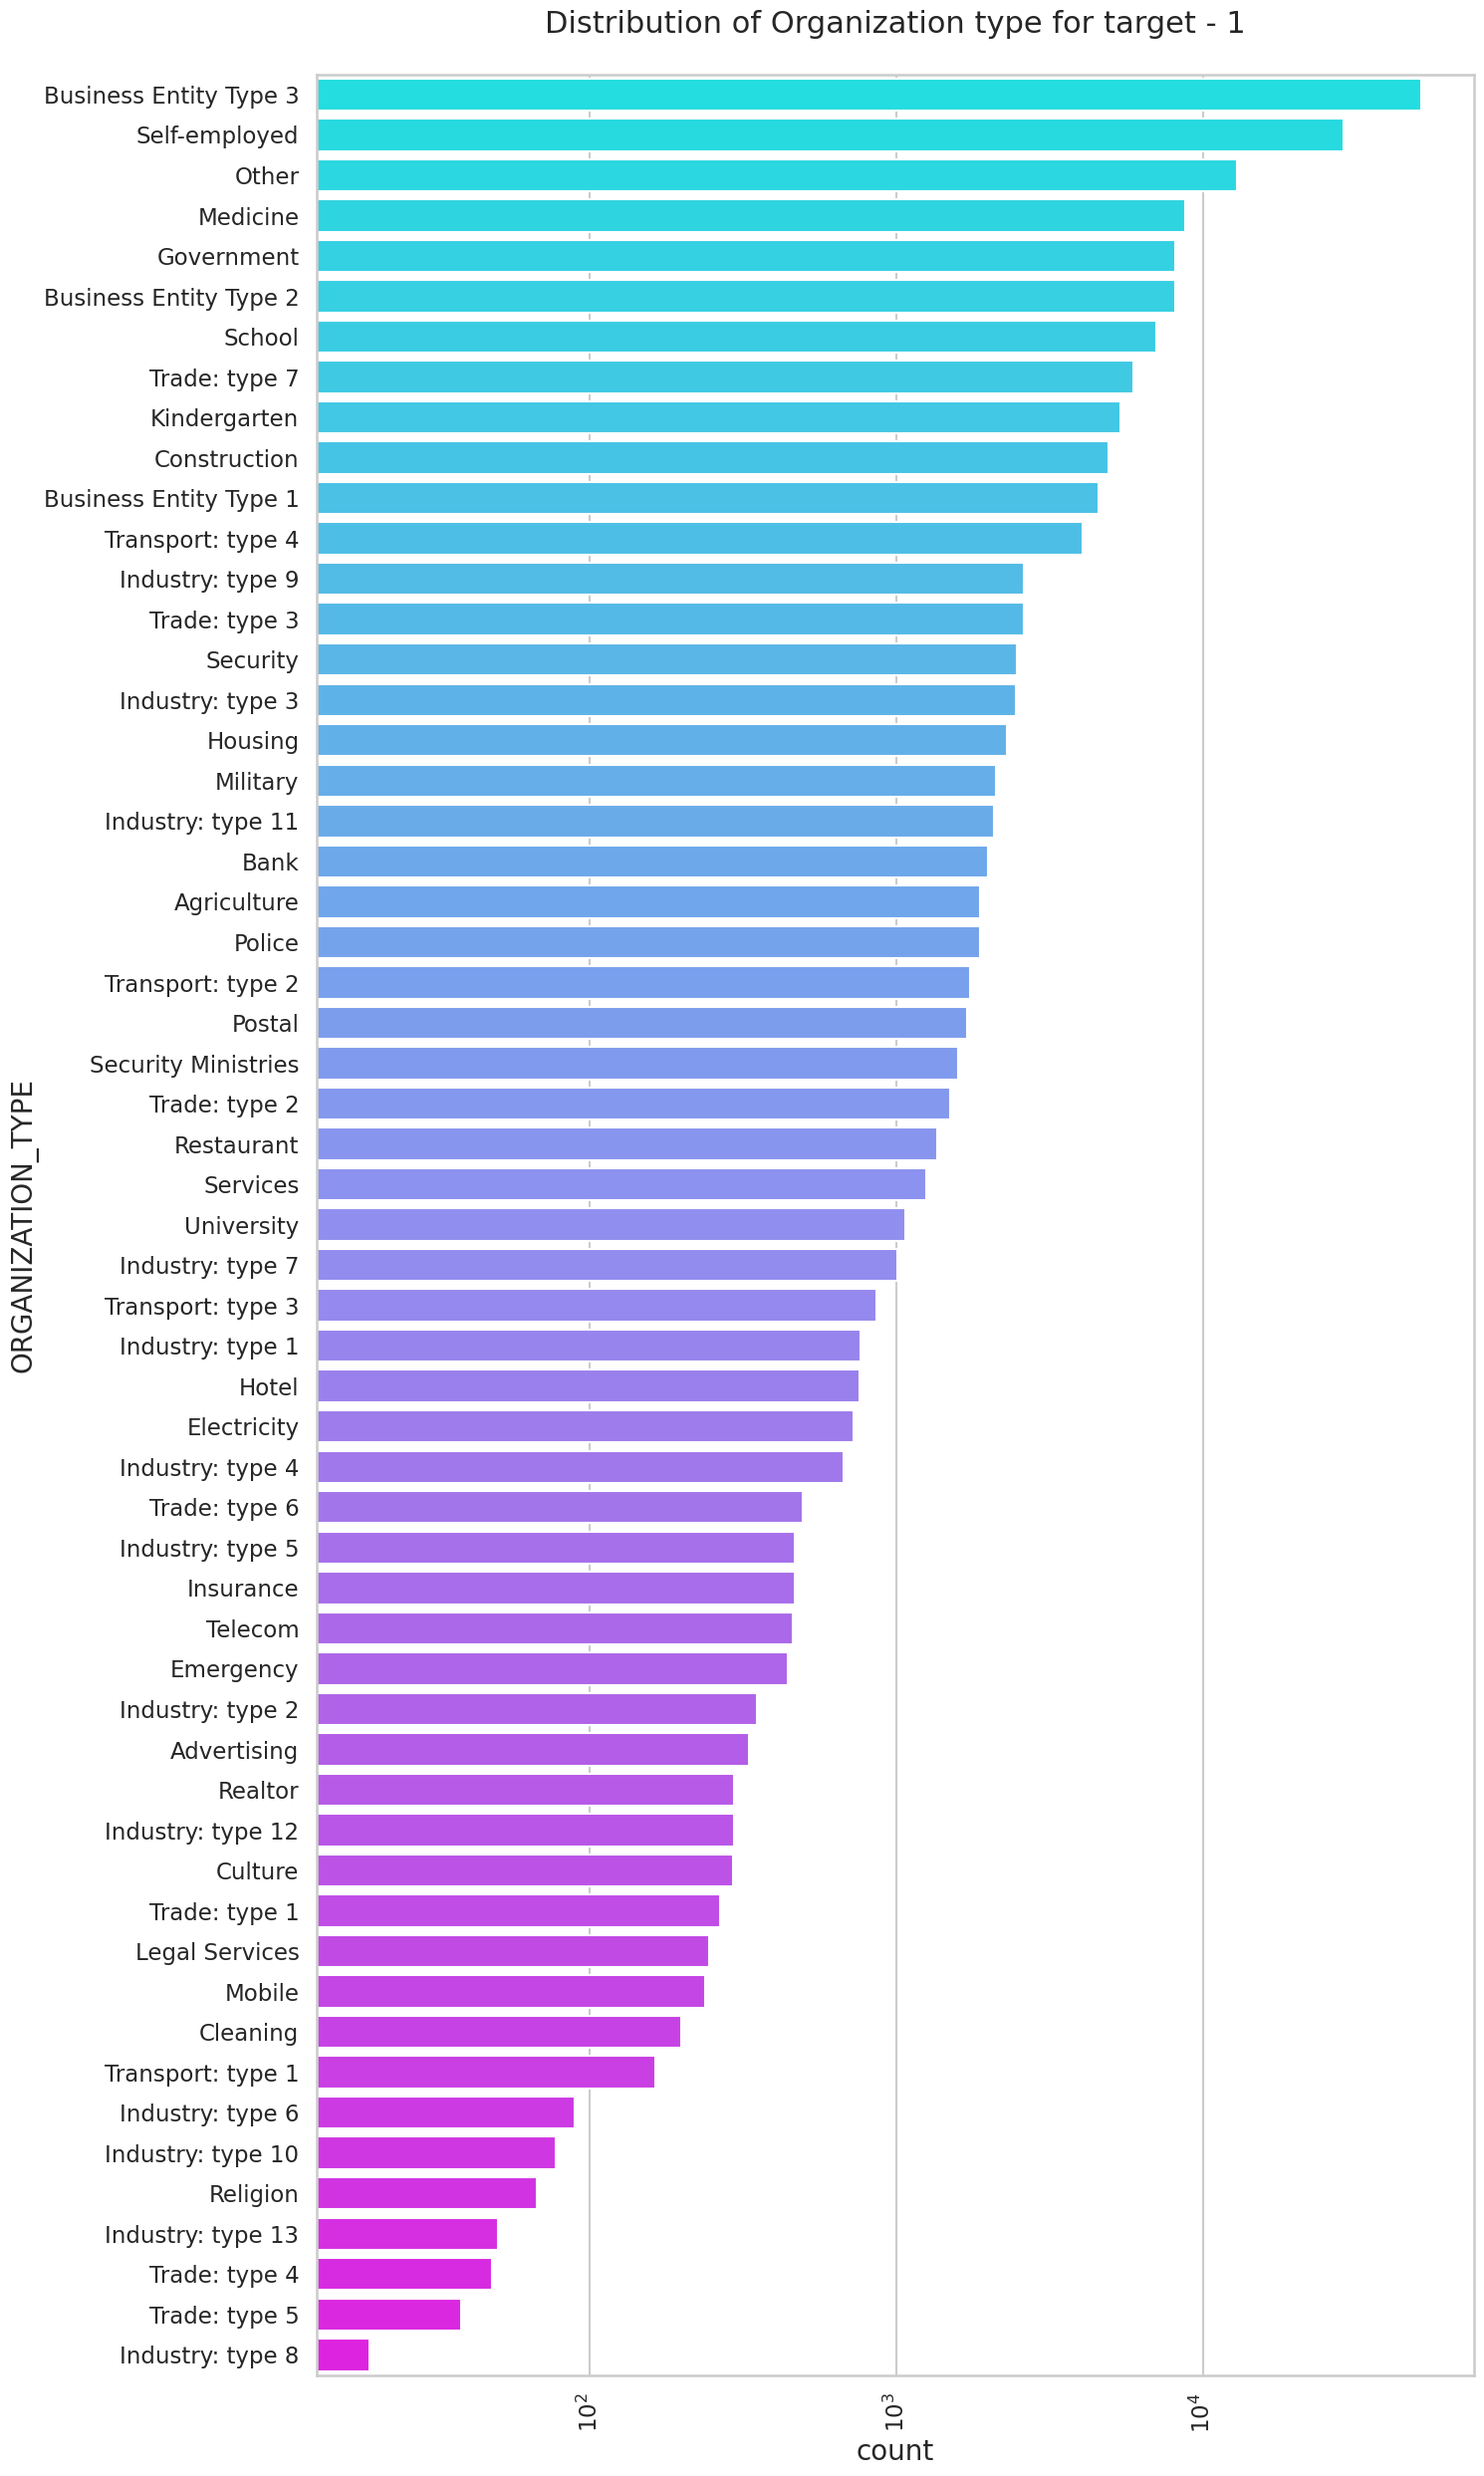

In [134]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Points to be concluded from the above graph.

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.
3. Same as type 0 in distribution of organization type.


In [194]:
# Finding some correlation for numerical columns for both target 0 and 1

target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')


<ipython-input-194-589619a0cbe2>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target0=target0_corr.corr(method='spearman')
<ipython-input-194-589619a0cbe2>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target1=target1_corr.corr(method='spearman')


In [195]:
# Correlation for target 0

target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.00,0.04,0.00,0.03,-0.00,-0.03,0.38,-0.16,0.18,-0.02,0.00,-0.01,0.01,0.02,0.03,0.08,0.07,-0.02,-0.05,0.02,-0.00,0.02,-0.00,0.00,0.00,0.00,-0.00,-0.01,-0.04
AMT_INCOME_TOTAL,0.04,1.00,0.42,0.49,0.42,0.10,0.09,-0.18,0.08,0.04,0.10,0.08,0.16,0.15,0.02,0.04,0.04,0.18,-0.10,-0.03,-0.03,-0.03,-0.04,0.00,0.01,0.01,0.07,0.03,0.06
AMT_CREDIT,0.00,0.42,1.00,0.83,0.99,0.05,-0.06,-0.12,0.01,-0.00,0.05,0.02,0.05,0.05,-0.03,-0.01,0.01,0.13,0.02,0.00,-0.01,0.00,-0.02,-0.00,0.00,-0.00,0.05,0.03,-0.04
AMT_ANNUITY,0.03,0.49,0.83,1.00,0.83,0.06,0.01,-0.13,0.04,0.02,0.05,0.04,0.08,0.07,-0.00,0.01,0.02,0.13,0.02,-0.01,-0.02,-0.01,-0.02,0.00,0.00,0.01,0.05,0.02,0.00
AMT_GOODS_PRICE,-0.00,0.42,0.99,0.83,1.00,0.06,-0.06,-0.12,0.01,-0.01,0.06,0.02,0.05,0.05,-0.03,-0.01,0.00,0.14,0.02,0.00,-0.02,0.00,-0.02,-0.00,0.00,-0.00,0.05,0.03,-0.04
REGION_POPULATION_RELATIVE,-0.03,0.10,0.05,0.06,0.06,1.00,-0.03,-0.00,-0.04,-0.01,0.13,-0.02,0.03,0.05,-0.04,-0.03,-0.01,0.19,-0.01,0.01,0.03,0.01,0.02,-0.00,-0.00,-0.01,0.05,-0.00,0.00
DAYS_BIRTH,0.38,0.09,-0.06,0.01,-0.06,-0.03,1.00,-0.23,0.30,0.26,0.10,0.07,0.10,0.07,0.18,0.24,0.16,-0.09,-0.20,0.02,-0.00,0.02,0.00,0.00,0.00,-0.00,0.01,-0.01,-0.06
DAYS_EMPLOYED,-0.16,-0.18,-0.12,-0.13,-0.12,-0.00,-0.23,1.00,-0.04,-0.12,-0.05,0.02,-0.01,-0.02,0.02,-0.08,-0.10,-0.08,-0.01,0.00,0.02,0.00,0.02,-0.01,0.00,0.00,-0.04,0.01,0.01
DAYS_REGISTRATION,0.18,0.08,0.01,0.04,0.01,-0.04,0.30,-0.04,1.00,0.09,-0.01,0.03,0.03,0.02,0.05,0.09,0.06,-0.06,-0.10,0.01,0.00,0.01,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.02
DAYS_ID_PUBLISH,-0.02,0.04,-0.00,0.02,-0.01,-0.01,0.26,-0.12,0.09,1.00,0.04,0.04,0.05,0.04,0.08,0.10,0.06,-0.04,-0.13,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.01,-0.01,-0.03


In [196]:
# Correlation for target 1

target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.00,-0.00,0.00,0.04,-0.01,-0.03,0.27,-0.12,0.14,-0.02,-0.02,-0.02,-0.02,-0.01,0.01,0.05,0.05,-0.02,-0.02,0.03,-0.00,0.03,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.04
AMT_INCOME_TOTAL,-0.00,1.00,0.36,0.43,0.36,0.05,-0.01,-0.12,0.04,-0.01,0.08,0.08,0.16,0.15,0.01,0.03,0.03,0.14,-0.07,-0.00,-0.02,-0.00,-0.03,0.01,-0.00,0.02,0.08,0.03,0.08
AMT_CREDIT,0.00,0.36,1.00,0.81,0.98,0.04,-0.16,-0.09,-0.02,-0.06,0.02,0.02,0.03,0.03,-0.03,-0.03,-0.01,0.11,0.07,0.02,-0.02,0.02,-0.03,0.00,-0.01,0.00,0.04,-0.02,-0.02
AMT_ANNUITY,0.04,0.43,0.81,1.00,0.80,0.02,-0.03,-0.10,0.04,-0.02,0.03,0.03,0.07,0.06,-0.01,0.01,0.02,0.11,0.04,0.01,-0.02,0.01,-0.03,0.02,-0.00,0.03,0.06,-0.00,-0.01
AMT_GOODS_PRICE,-0.01,0.36,0.98,0.80,1.00,0.05,-0.16,-0.09,-0.02,-0.07,0.04,0.02,0.03,0.04,-0.03,-0.03,-0.01,0.12,0.08,0.02,-0.02,0.02,-0.03,0.01,-0.01,0.00,0.05,-0.01,-0.02
REGION_POPULATION_RELATIVE,-0.03,0.05,0.04,0.02,0.05,1.00,-0.05,0.00,-0.03,-0.02,0.11,-0.03,-0.01,0.02,-0.06,-0.04,-0.02,0.15,-0.01,0.03,0.05,0.03,0.04,-0.00,-0.00,0.00,0.05,-0.01,0.01
DAYS_BIRTH,0.27,-0.01,-0.16,-0.03,-0.16,-0.05,1.00,-0.10,0.23,0.25,0.06,0.06,0.07,0.04,0.17,0.20,0.11,-0.12,-0.17,0.00,0.01,0.00,0.01,0.02,-0.00,-0.00,0.01,-0.01,-0.08
DAYS_EMPLOYED,-0.12,-0.12,-0.09,-0.10,-0.09,0.00,-0.10,1.00,-0.02,-0.05,-0.03,0.04,0.01,-0.00,0.05,-0.03,-0.05,-0.07,-0.01,-0.03,0.01,-0.03,0.01,0.00,0.02,0.01,-0.03,0.01,-0.03
DAYS_REGISTRATION,0.14,0.04,-0.02,0.04,-0.02,-0.03,0.23,-0.02,1.00,0.09,-0.03,0.01,0.01,0.01,0.03,0.07,0.05,-0.07,-0.08,0.02,0.01,0.02,0.01,-0.00,-0.00,-0.00,0.01,-0.01,-0.01
DAYS_ID_PUBLISH,-0.02,-0.01,-0.06,-0.02,-0.07,-0.02,0.25,-0.05,0.09,1.00,0.03,0.03,0.03,0.01,0.07,0.07,0.03,-0.06,-0.13,-0.02,0.00,-0.02,0.00,0.01,-0.02,0.01,-0.00,0.01,-0.05


In [197]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()



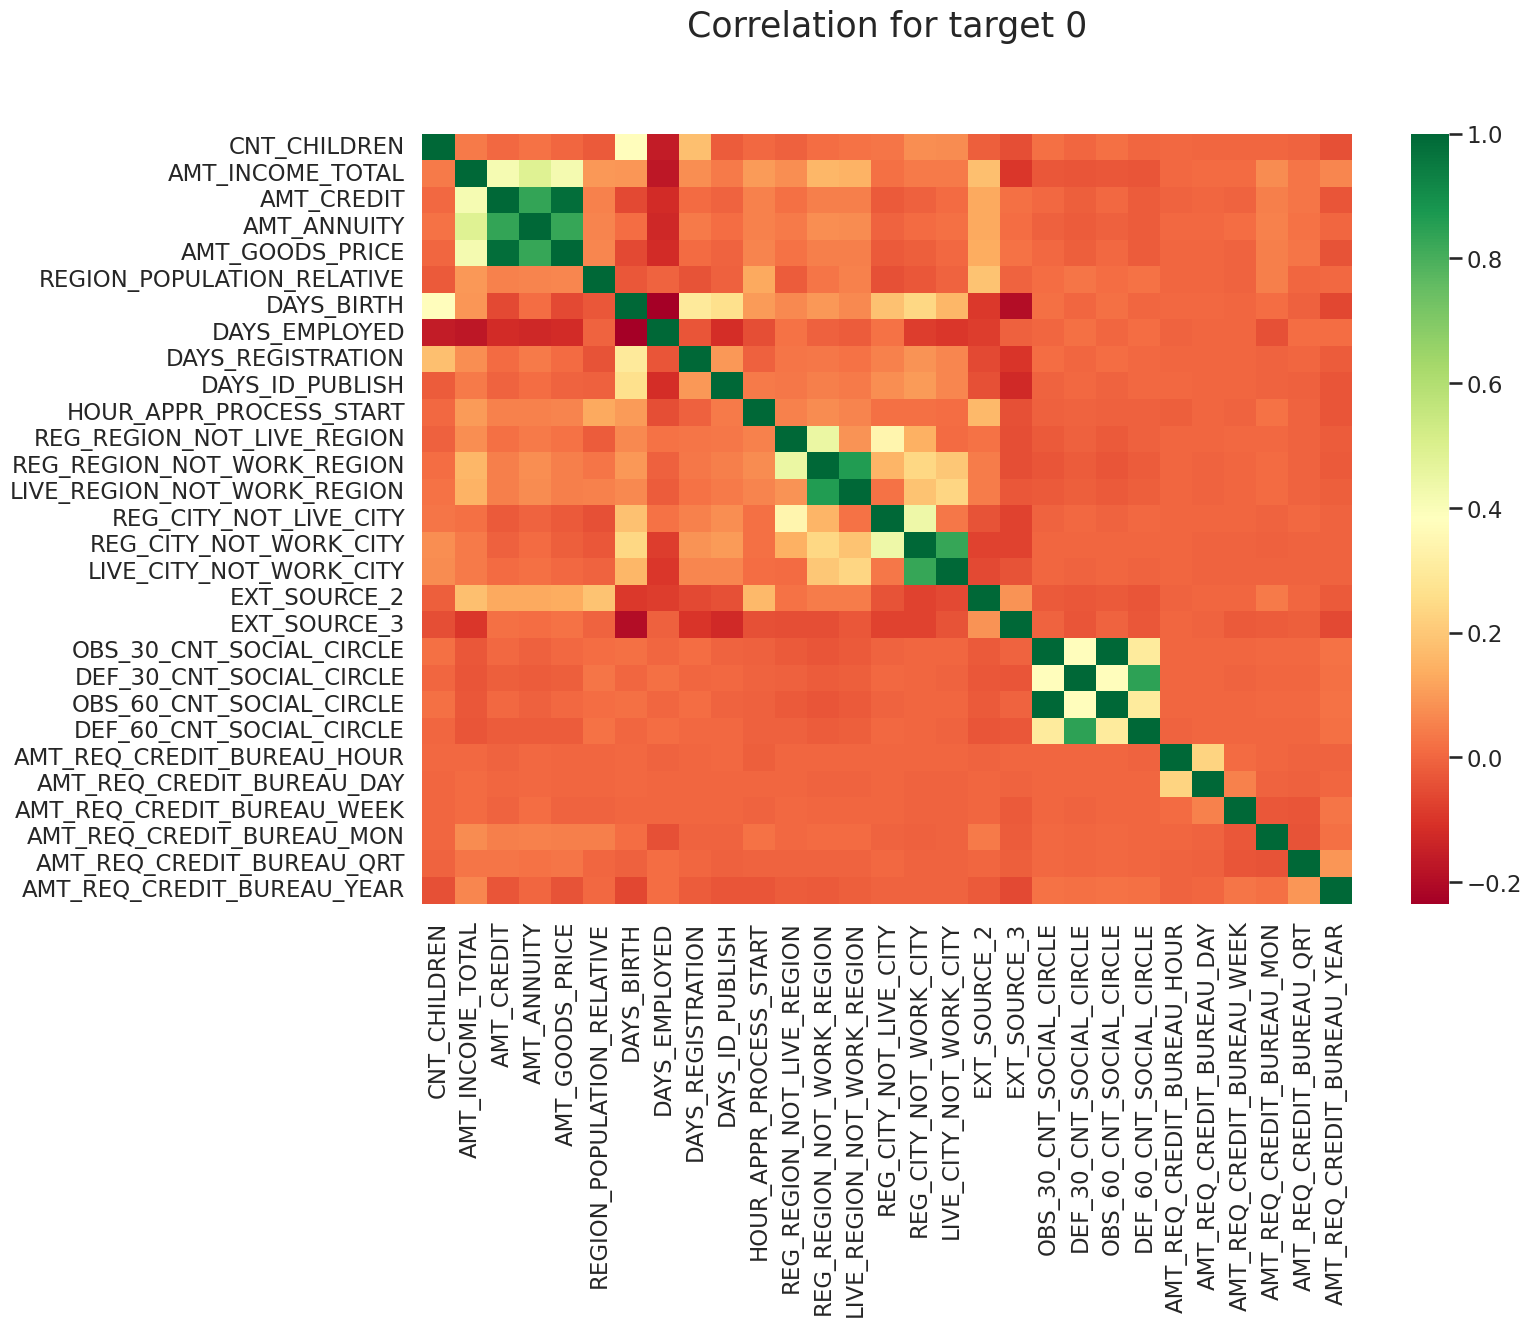

In [198]:
# For Target 0

targets_corr(data=target0,title='Correlation for target 0')

As we can see from above correlation heatmap, There are number of observation we can point out

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

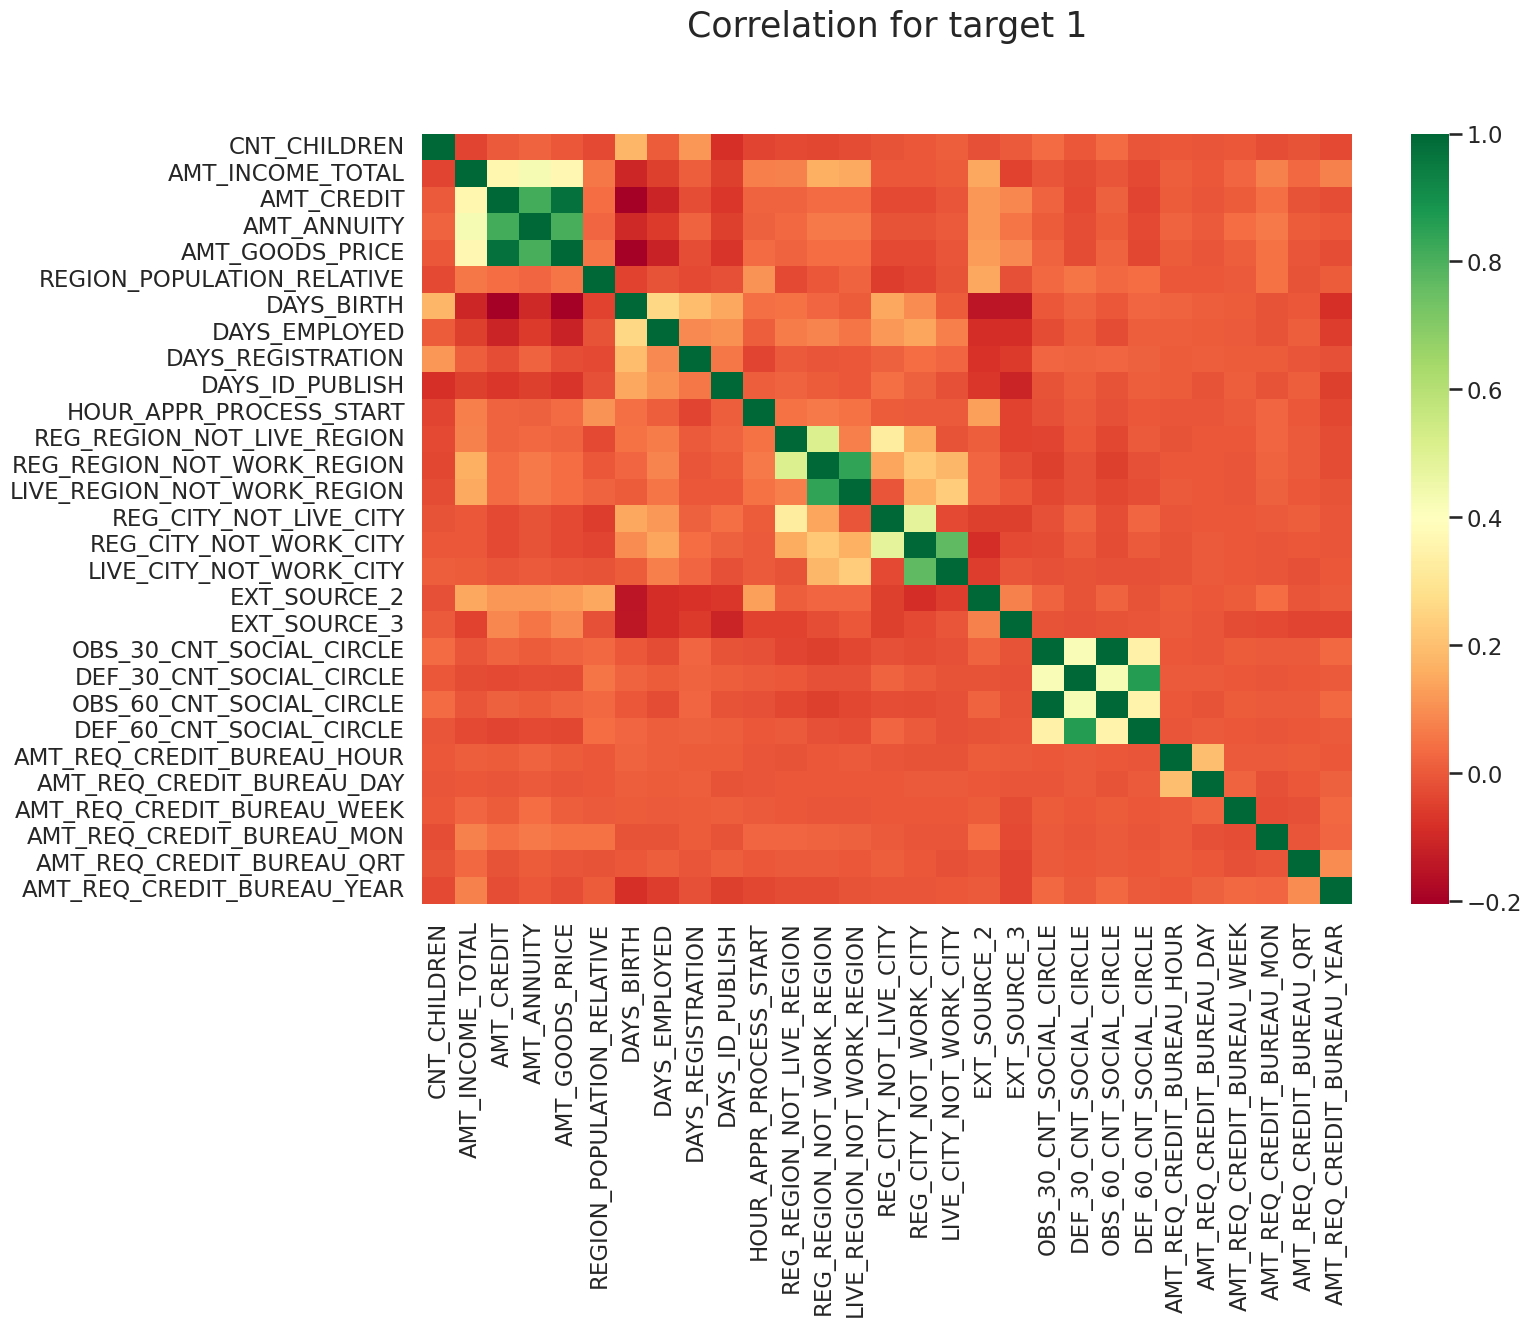

In [140]:
# For Target 1

targets_corr(data=target1,title='Correlation for target 1')

This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

1. The client's permanent address does not match contact address are having less children and vice-versa
2. the client's permanent address does not match work address are having less children and vice-versa

**Univariate analysis for variables**

In [202]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target1_df, x=col,orient='v')
    plt.show()


**For Target 0 - Finding any outliers**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:764: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


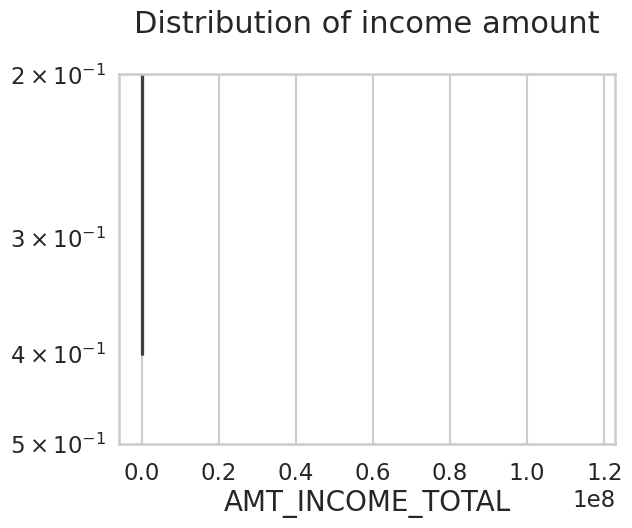

In [203]:
# Distribution of income amount

univariate_numerical(data=target0_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in income amount.




/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:764: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


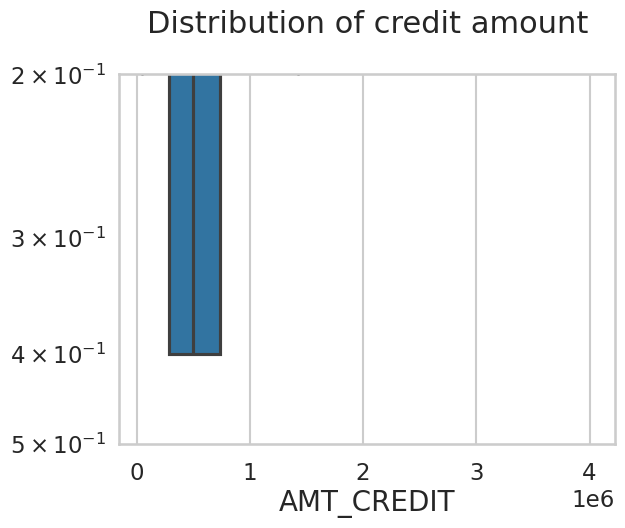

In [204]:
# Disrtibution of credit amount

univariate_numerical(data=target0_df,col='AMT_CREDIT',title='Distribution of credit amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in credit amount.




/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:764: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


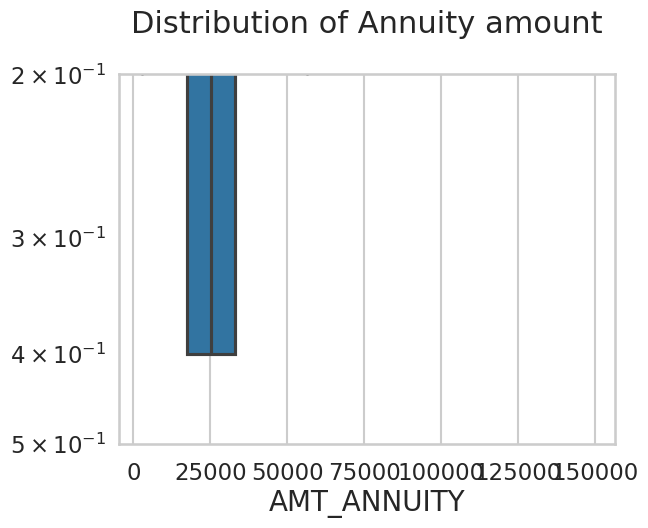

In [205]:
# Distribution of anuuity amount

univariate_numerical(data=target0_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in annuity amount.



**For Target 1 - Finding any outliers**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:764: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


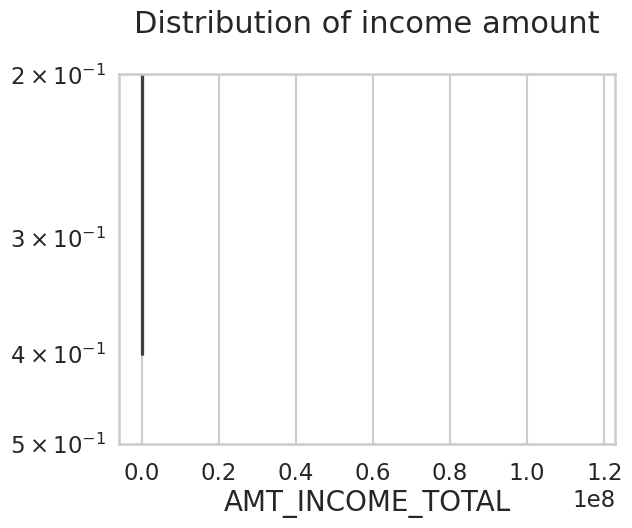

In [206]:
# Distribution of income amount

univariate_numerical(data=target1_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in income amount.




/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:764: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


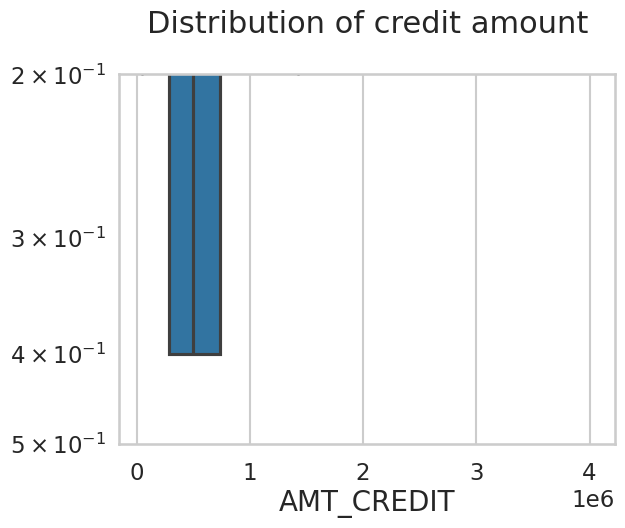

In [207]:
# Distribution of credit amount

univariate_numerical(data=target1_df,col='AMT_CREDIT',title='Distribution of credit amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in credit amount.



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:764: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


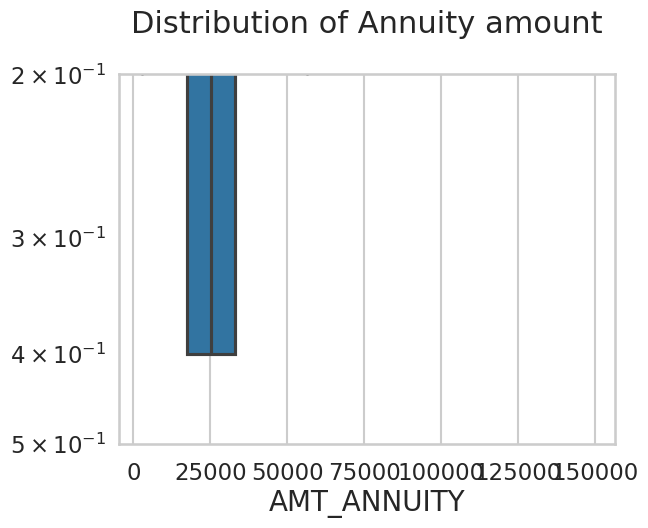

In [208]:
# Distribution of Annuity amount

univariate_numerical(data=target1_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in annuity amount.



**Bivariate analysis for numerical variables**

**For Target 0**

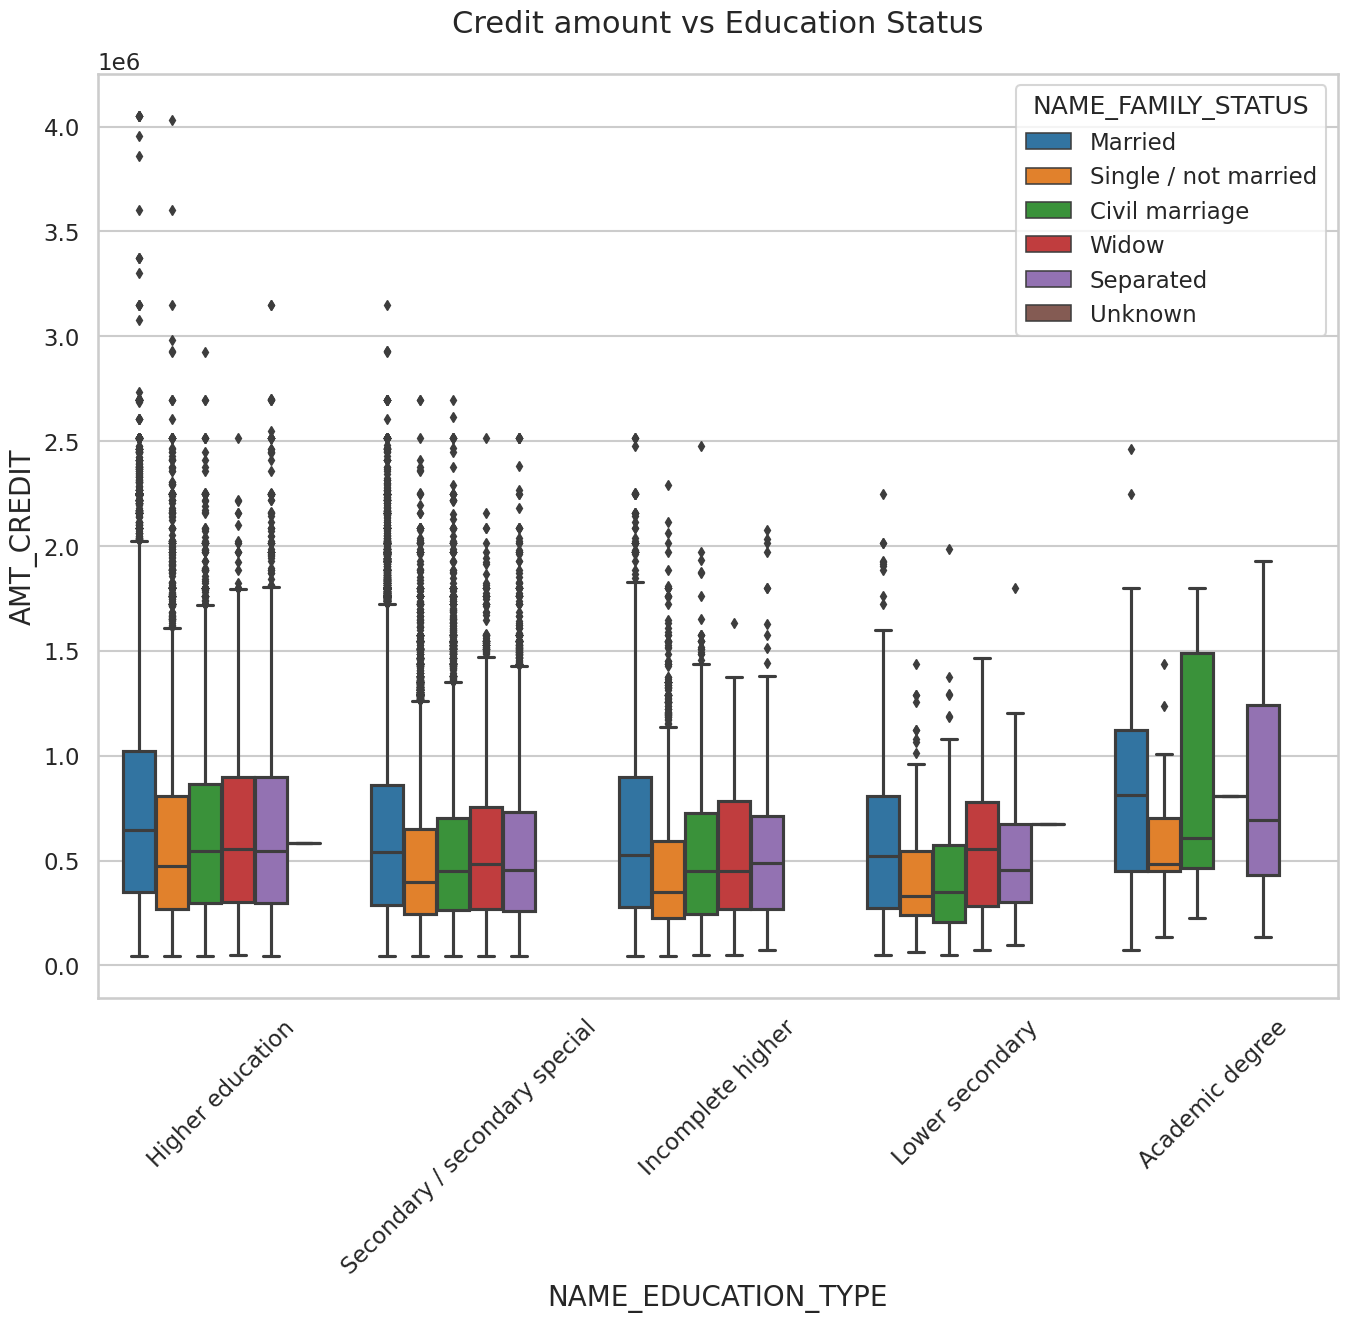

In [148]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
Civil marriage for Academic degree is having most of the credits in the third quartile.

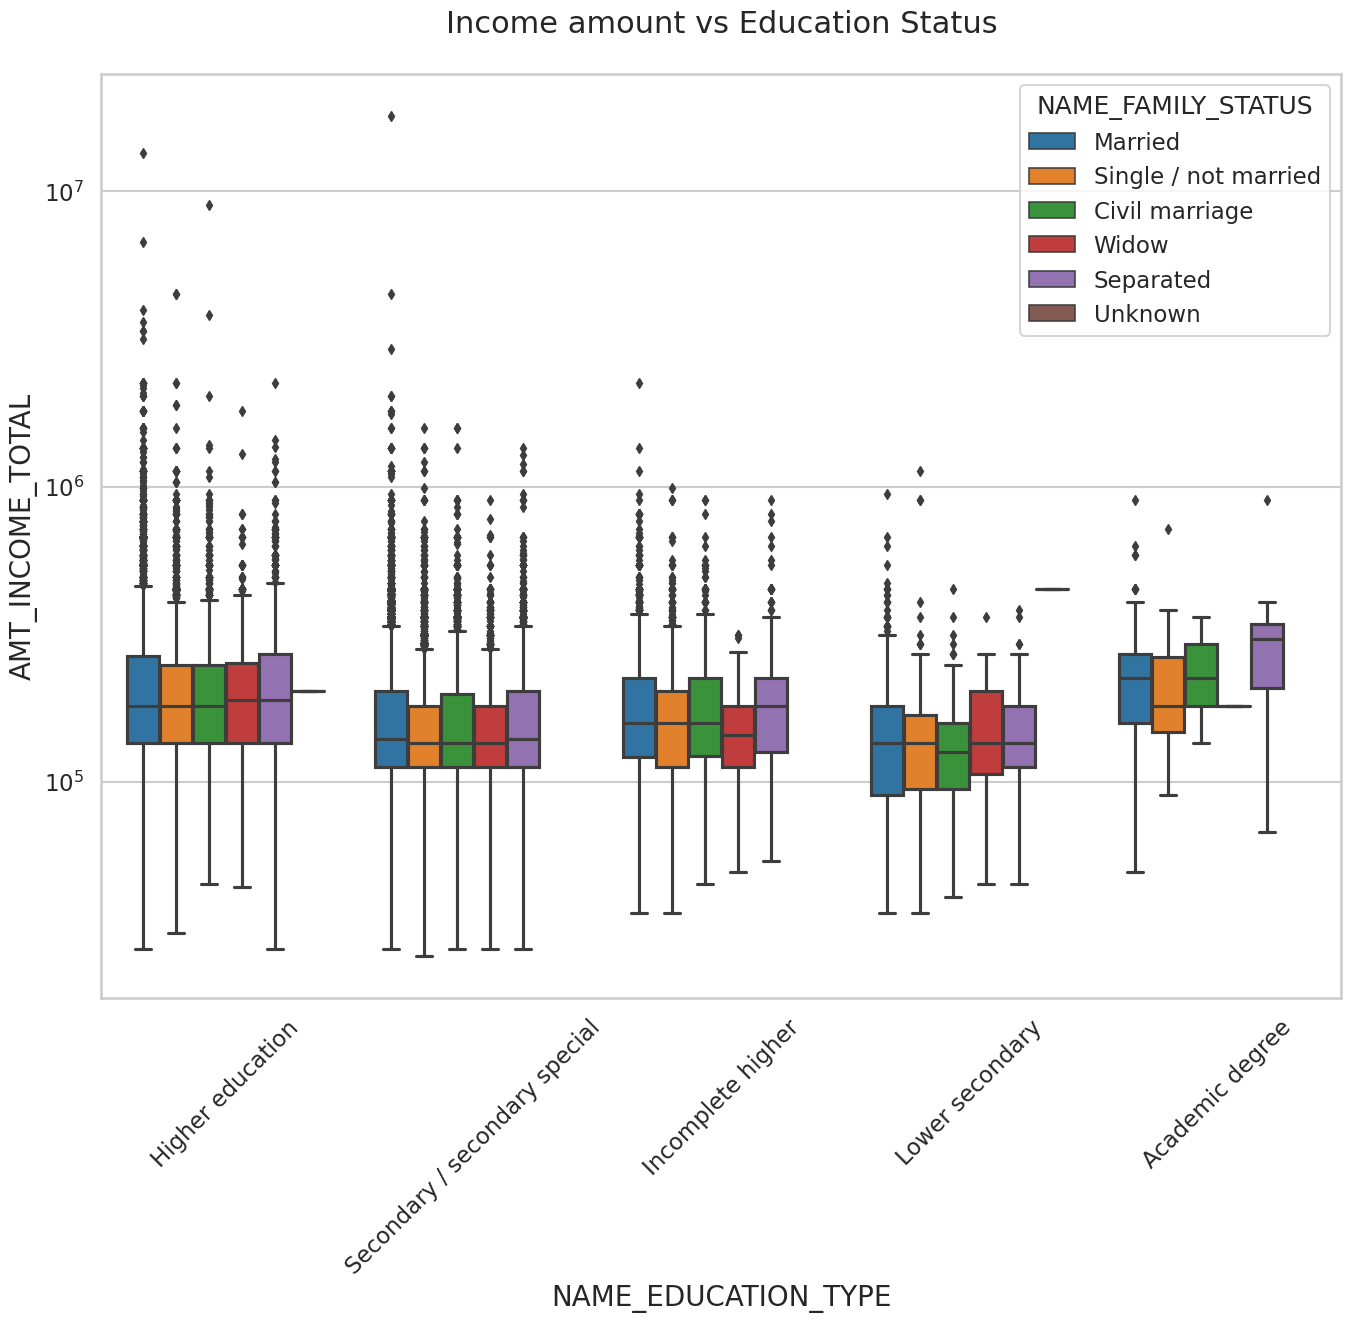

In [149]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary of civil marriage family status are have less income amount than others.

**For Target 1**

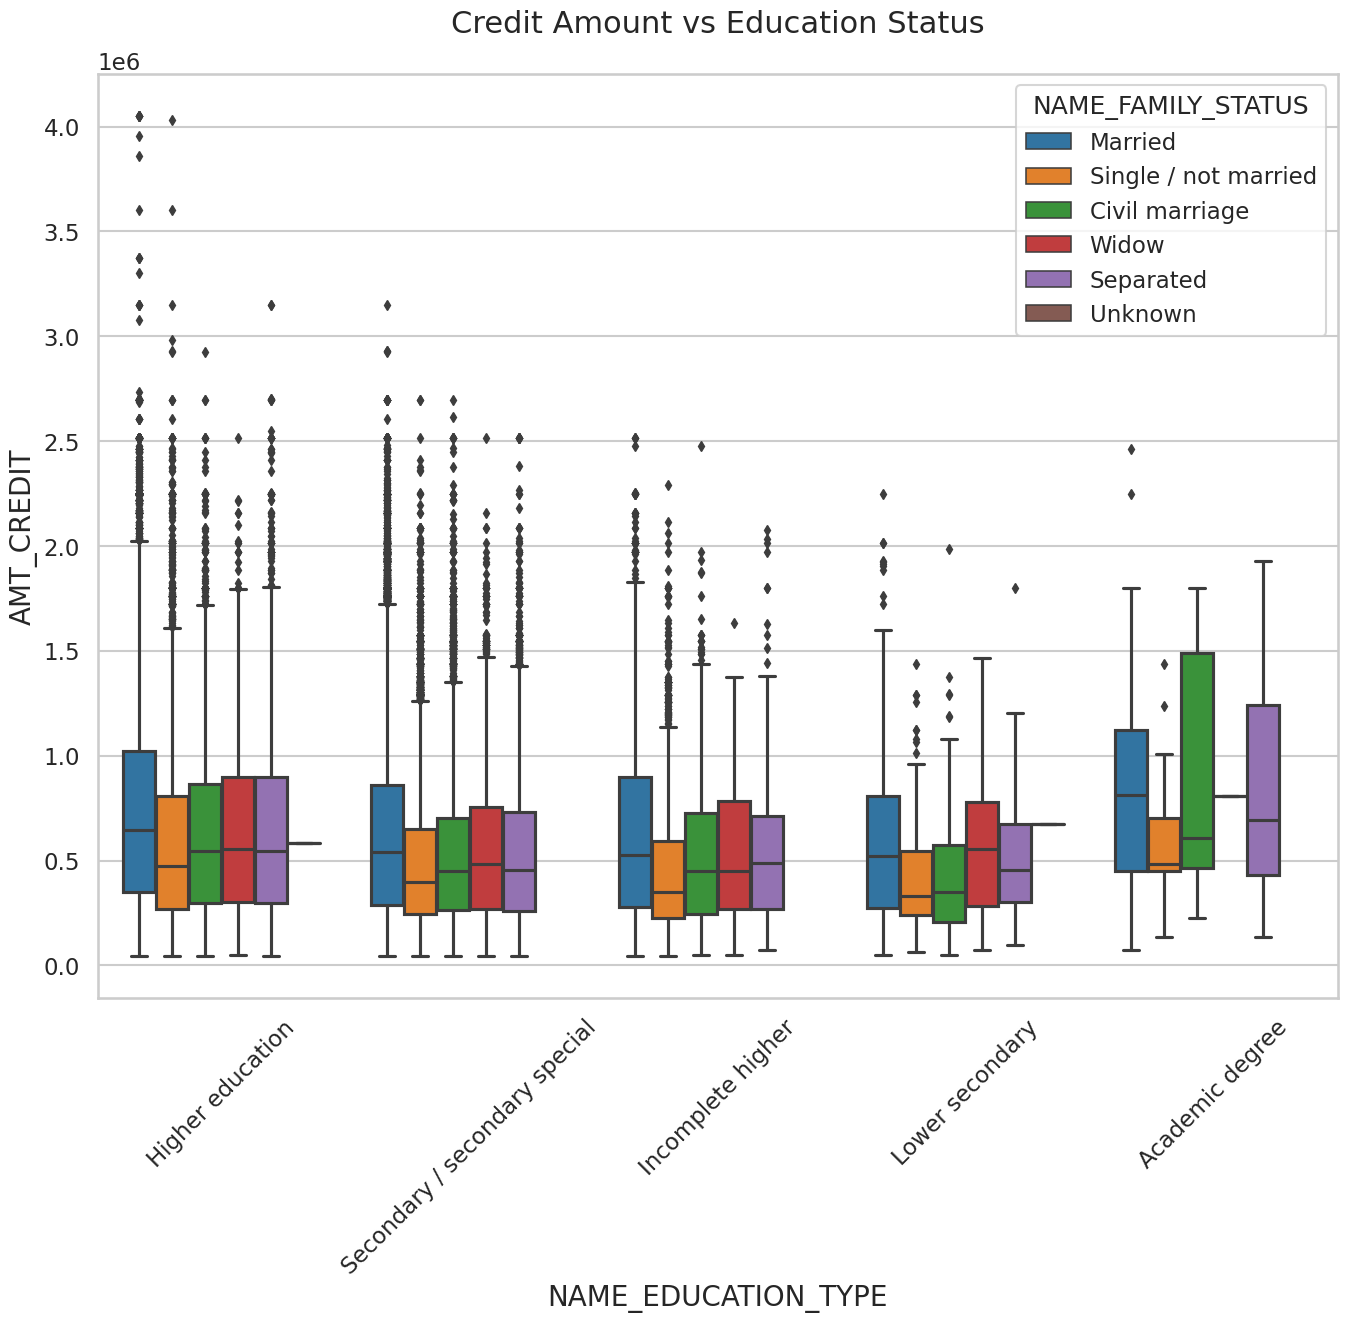

In [150]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Quite similar with Target 0
From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'.
Civil marriage for Academic degree is having most of the credits in the third quartile.

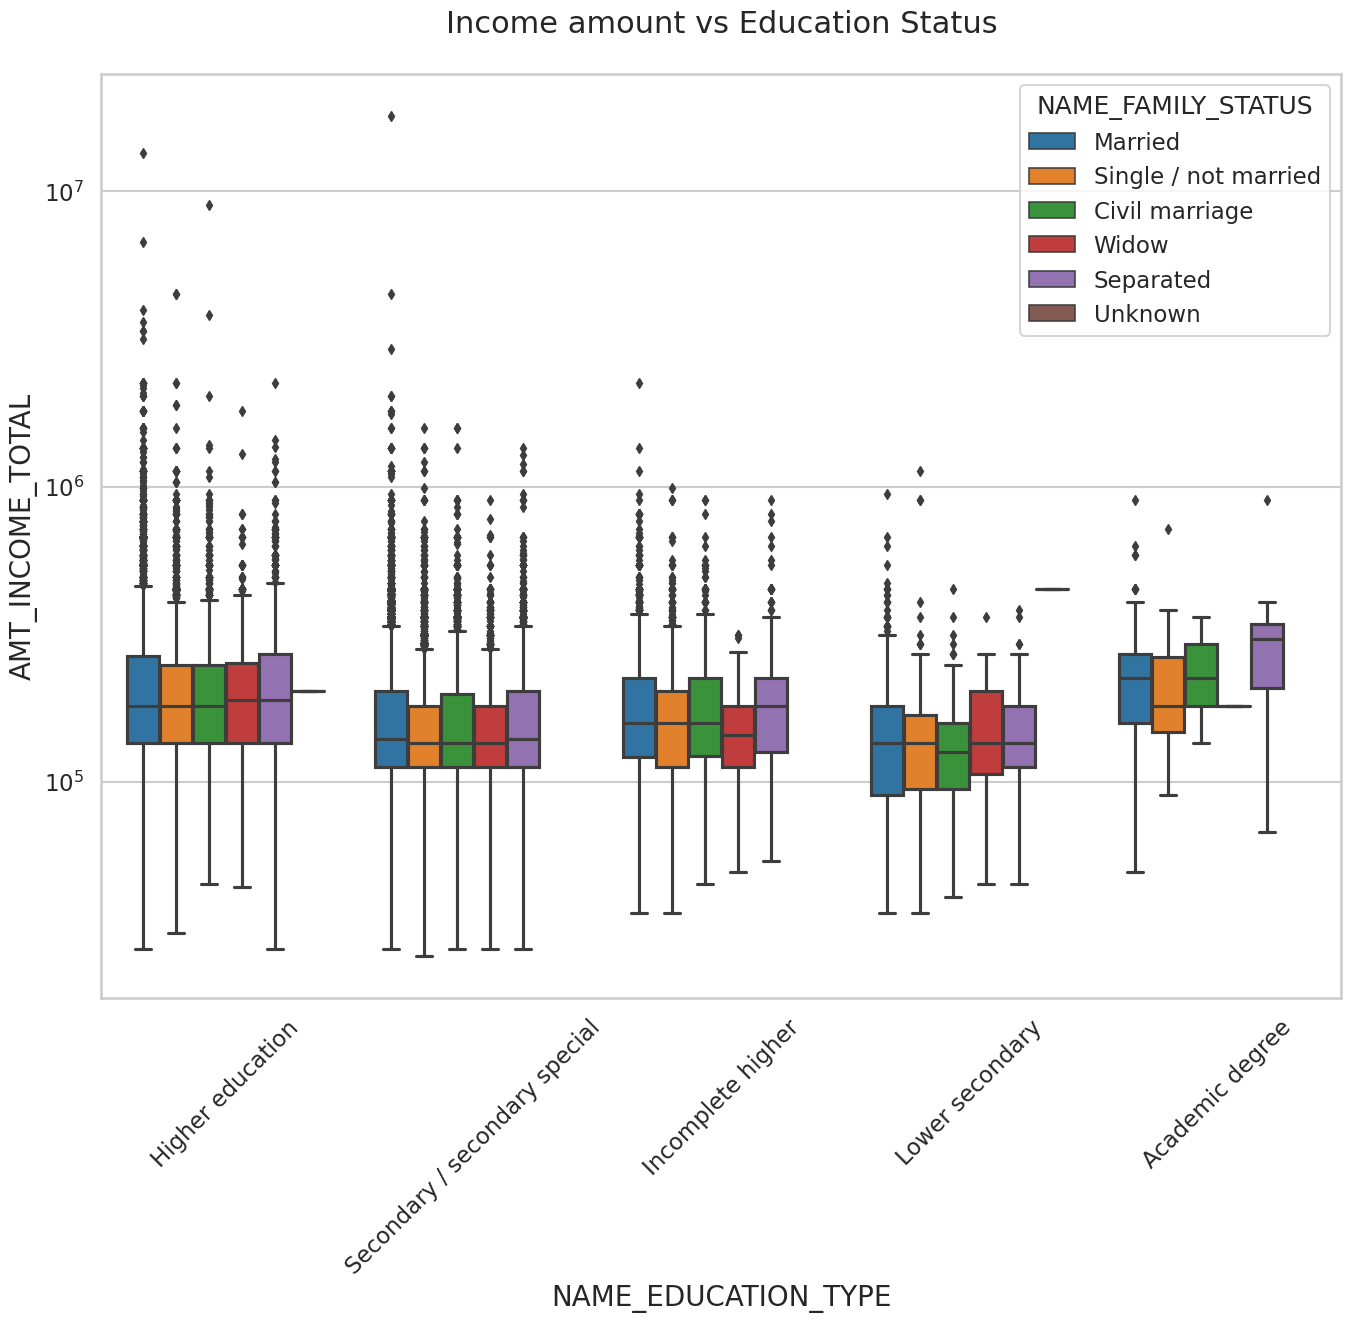

In [151]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Have some similarity with Target0,
From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary are have less income amount than others.

In [209]:
# Reading the dataset of previous application

df1=pd.read_csv(r"previous_application.csv")



In [210]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol1=df1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)


15

In [211]:
# Removing those 15 columns

emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
df1.drop(labels=emptycol1,axis=1,inplace=True)

df1.shape

(574382, 22)

In [212]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(23699, 22)

In [213]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

<ipython-input-213-63a74f4beb78>:3: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')


In [214]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)



In [215]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

**Performing univariate analysis**

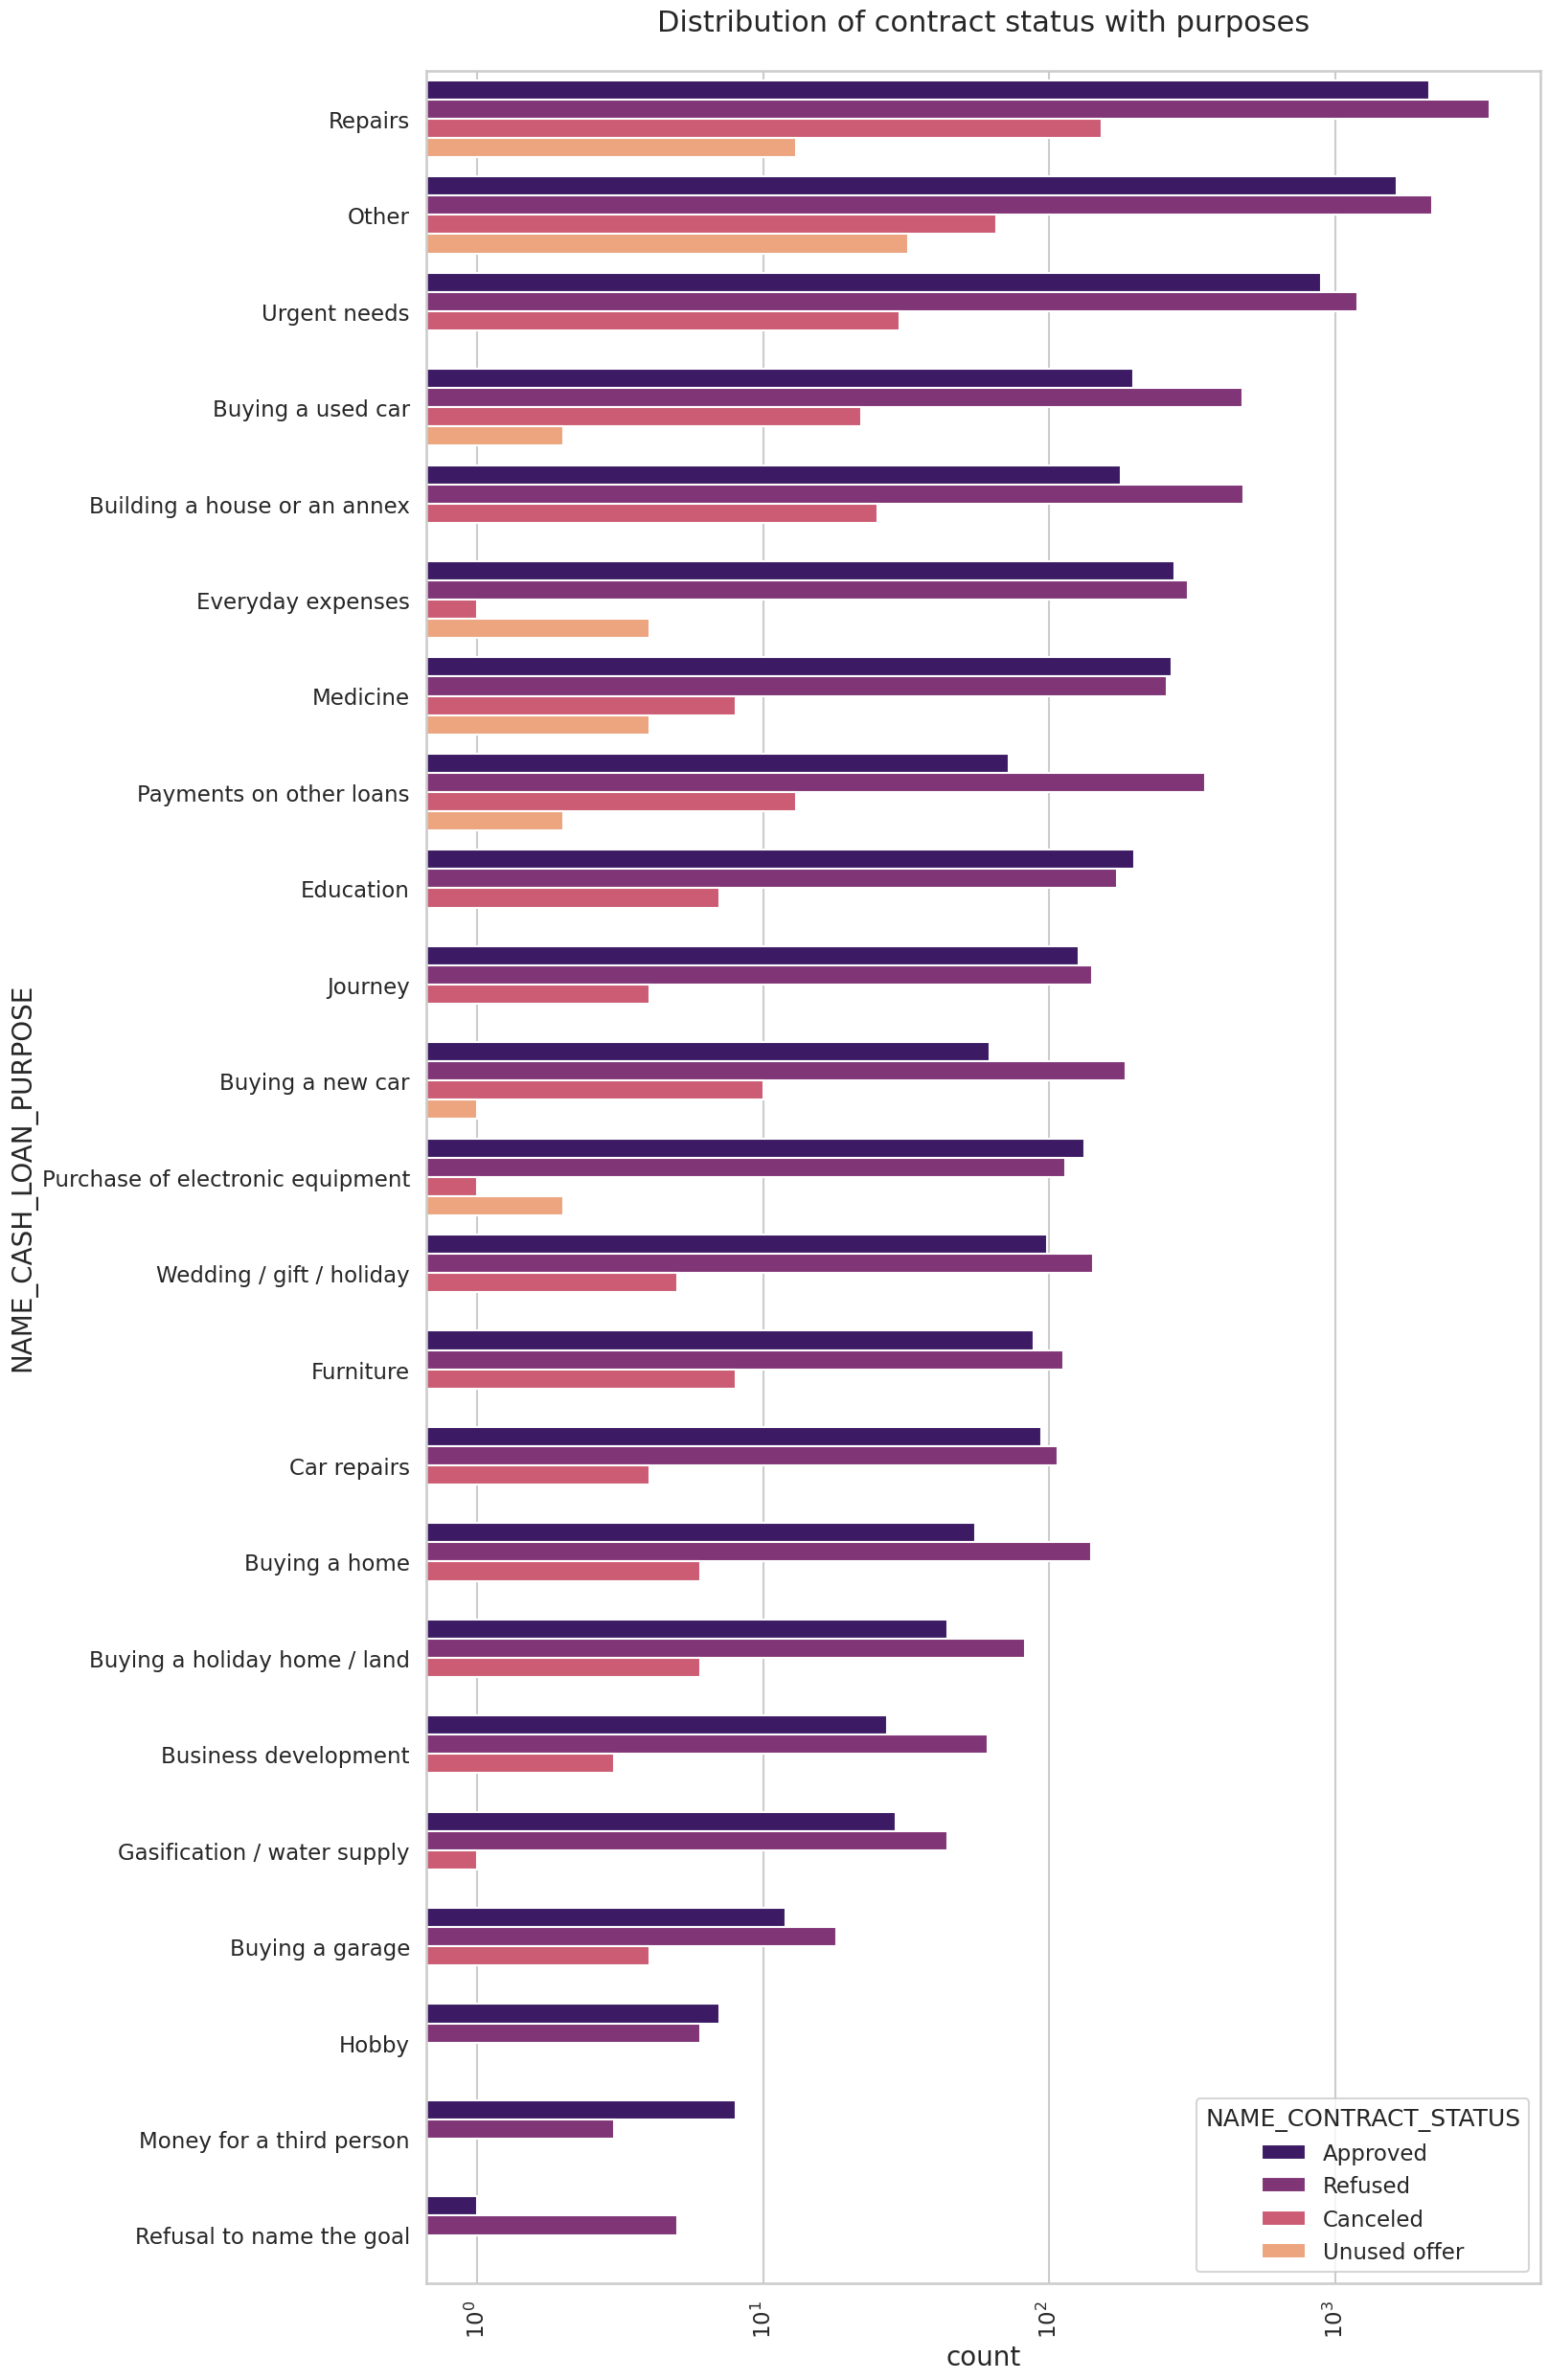

In [216]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

Points to be concluded from above plot:

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. Paying other loans and buying a new car is having significant higher rejection than approves.

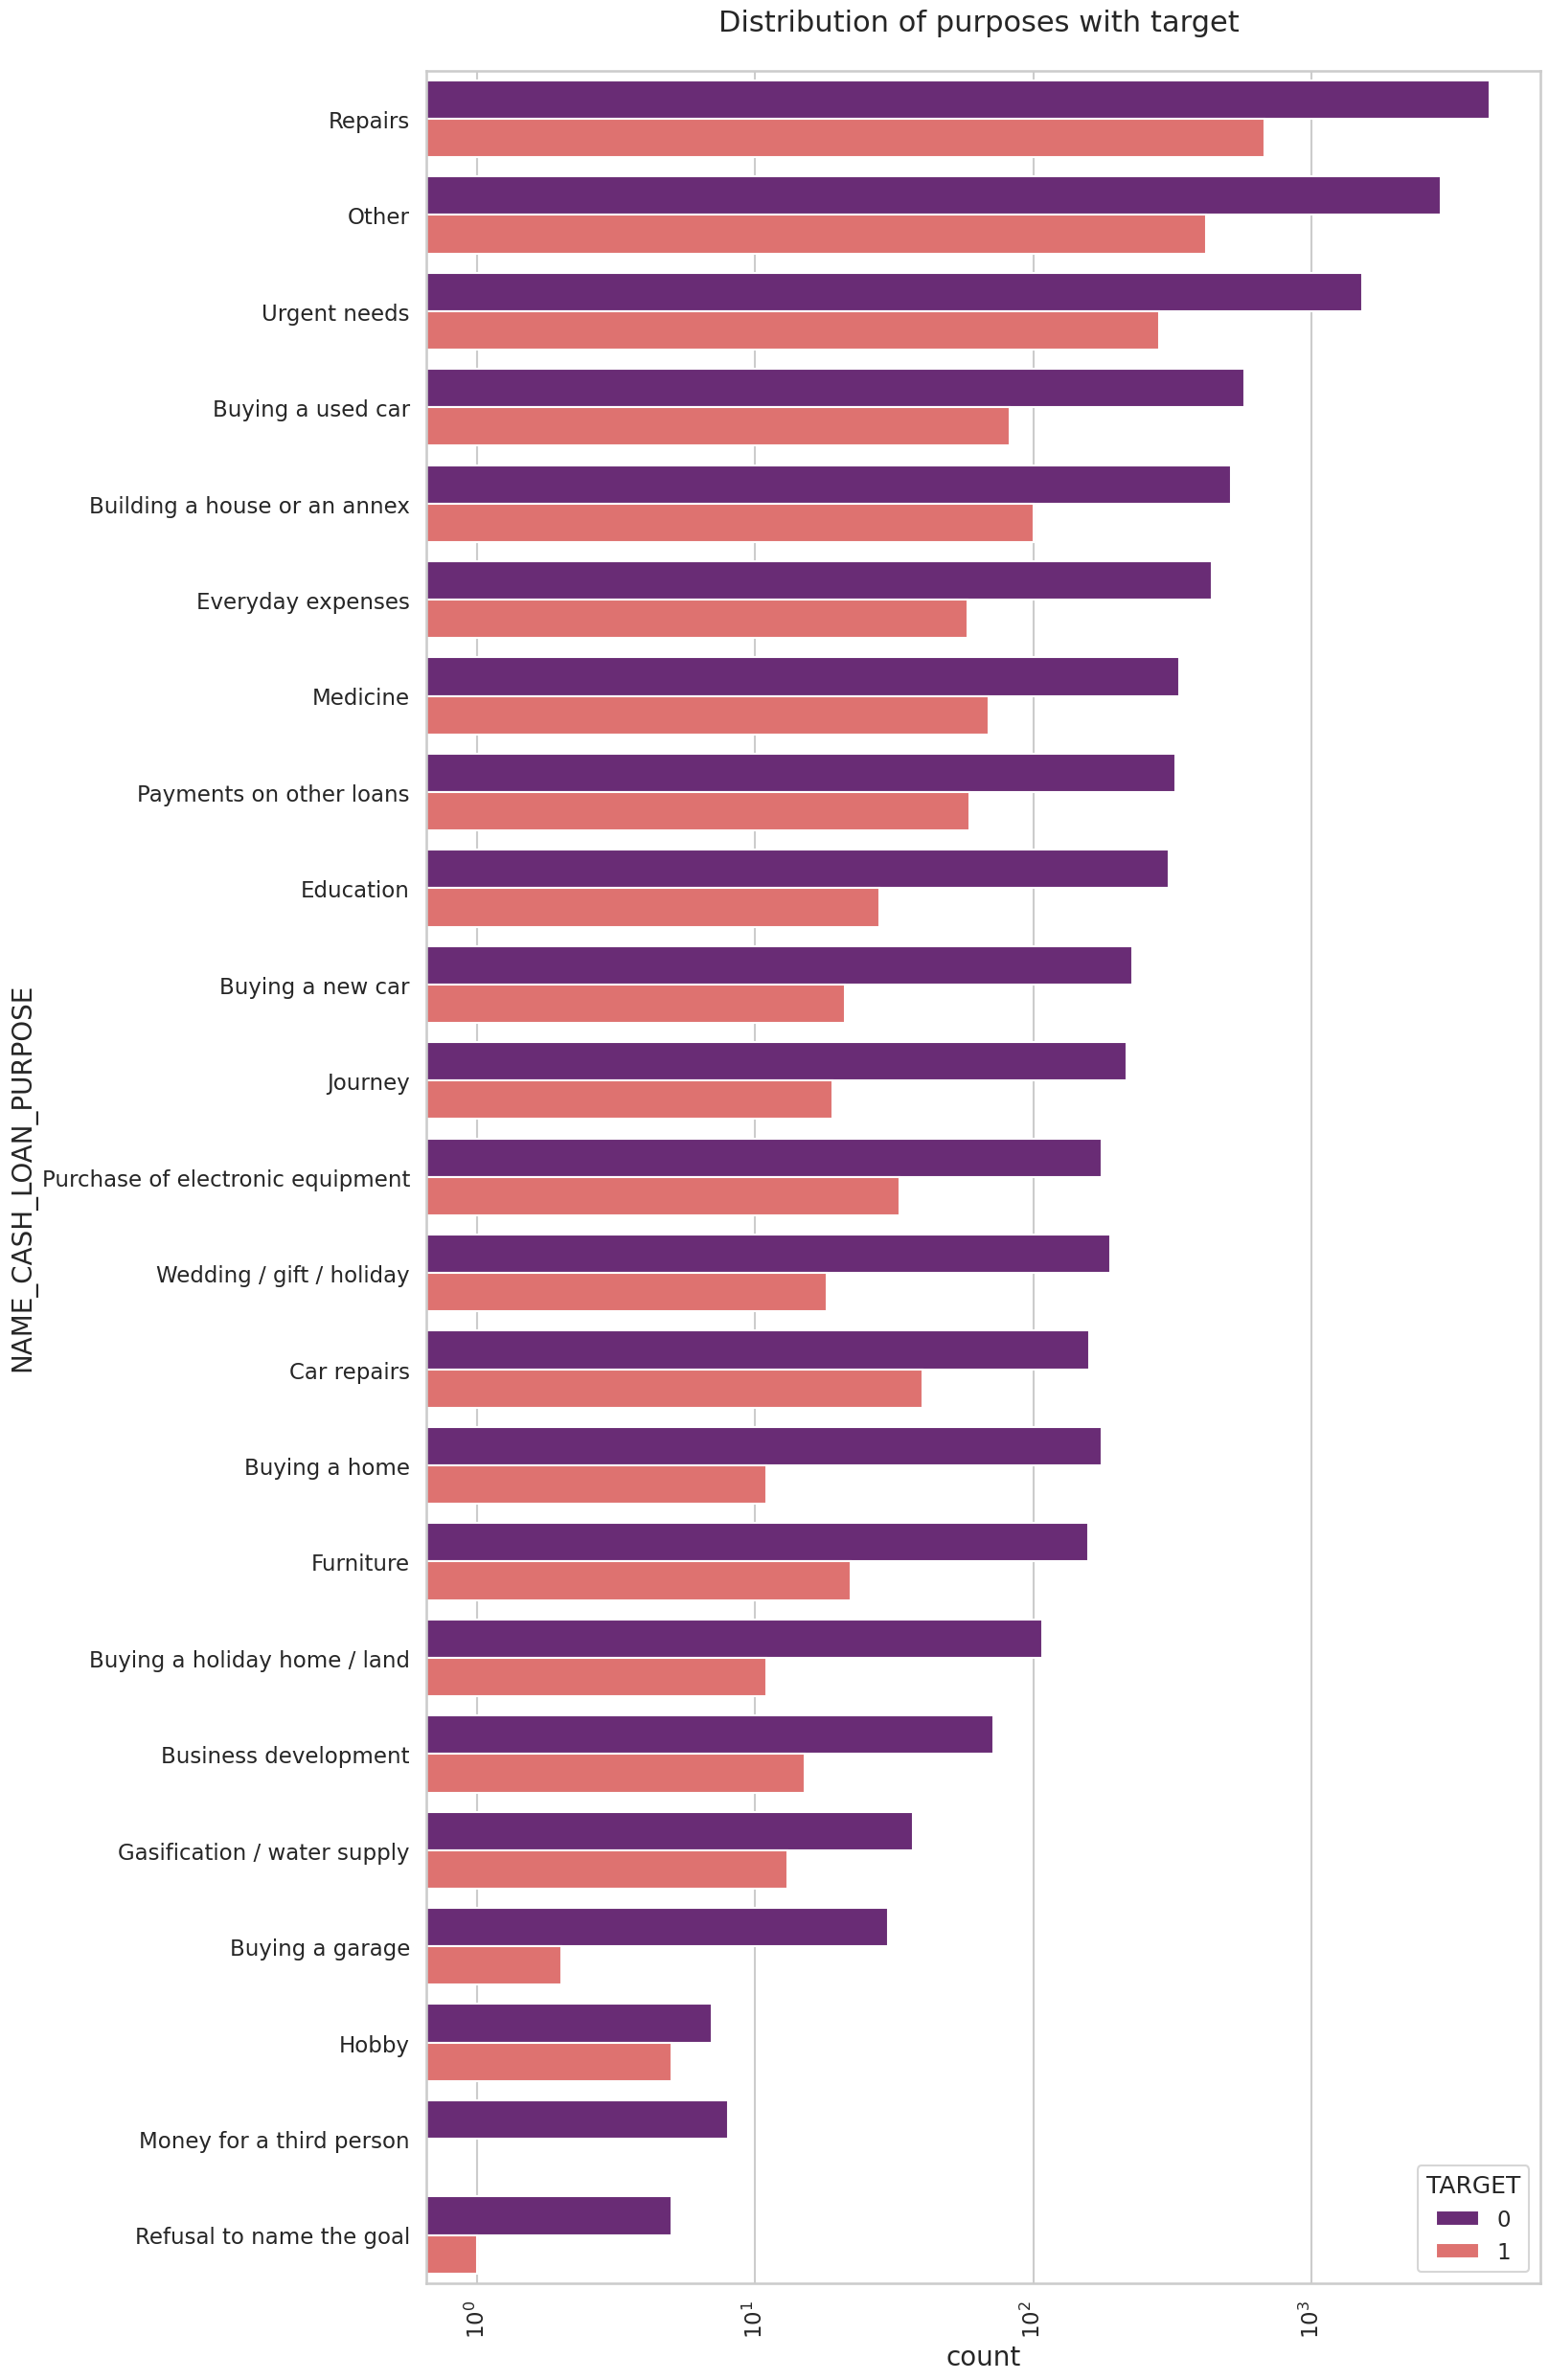

In [160]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

Few points we can conclude from abpve plot:

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties.
    They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'
Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

**Performing bivariate analysis**

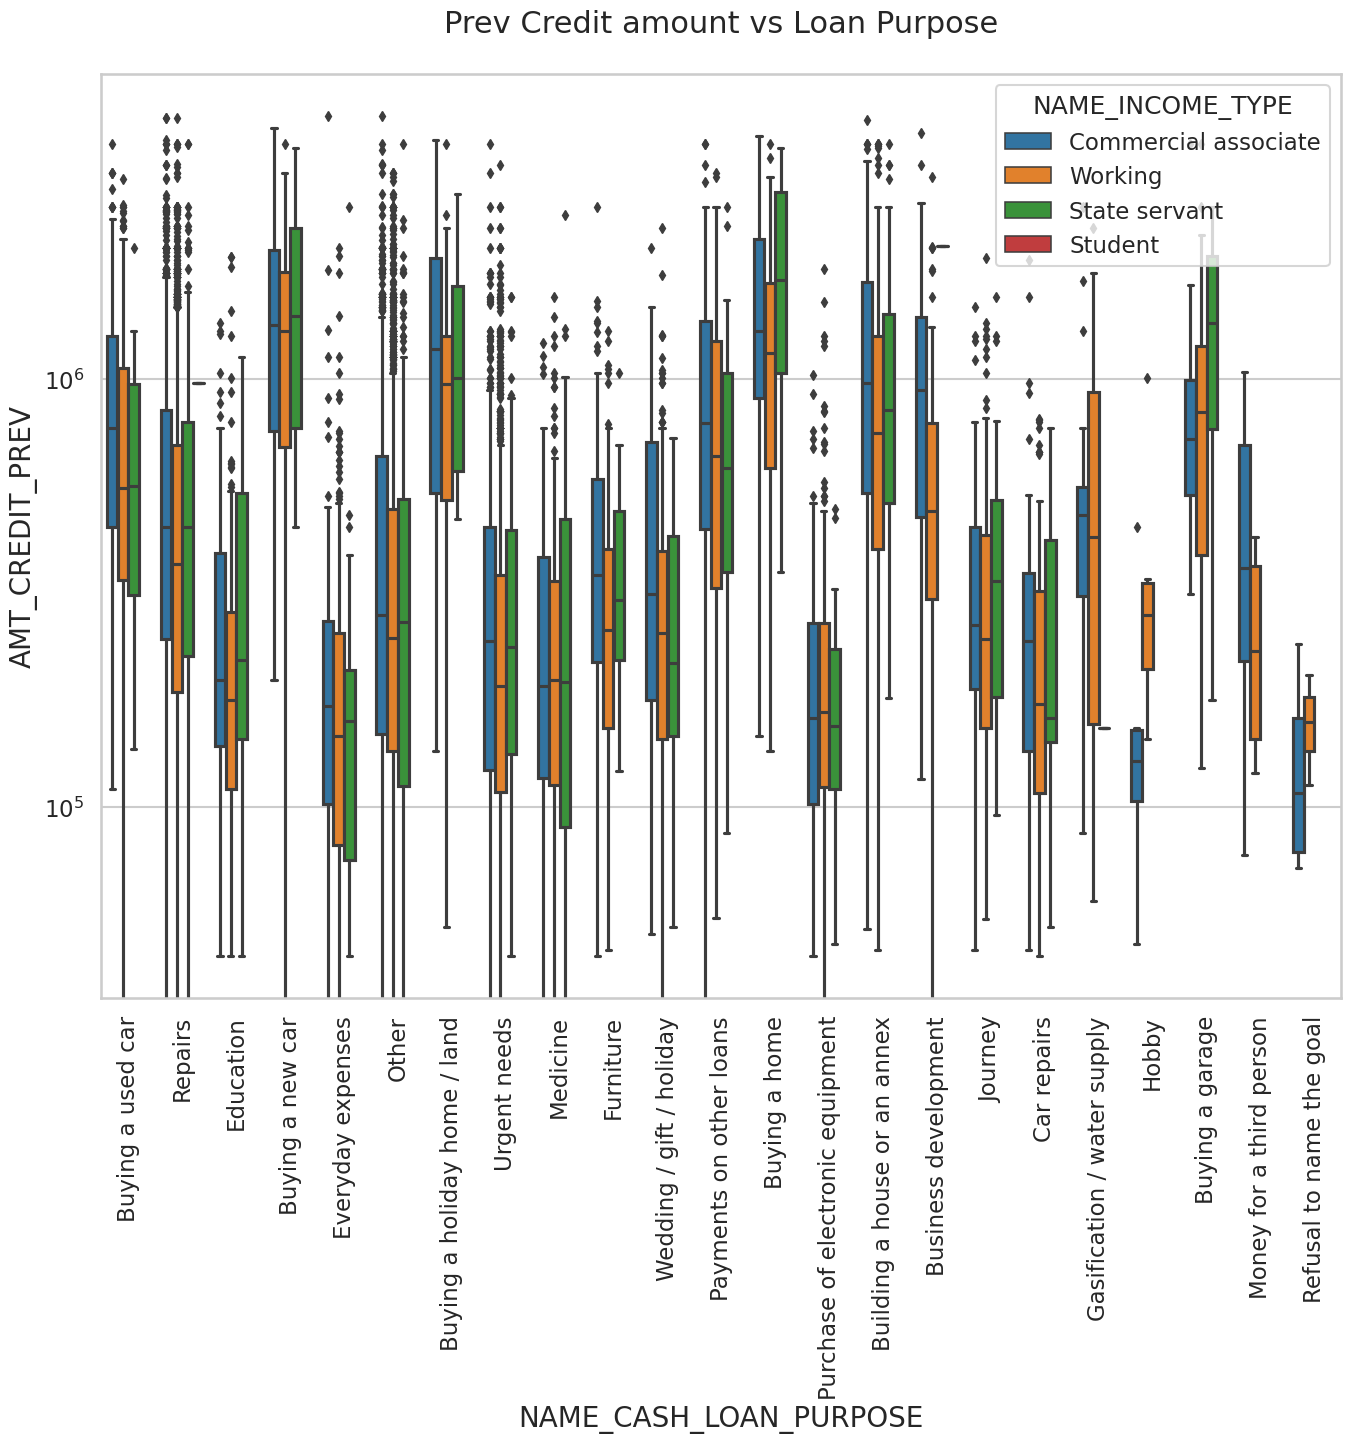

In [161]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

From the above we can conclude some points-

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

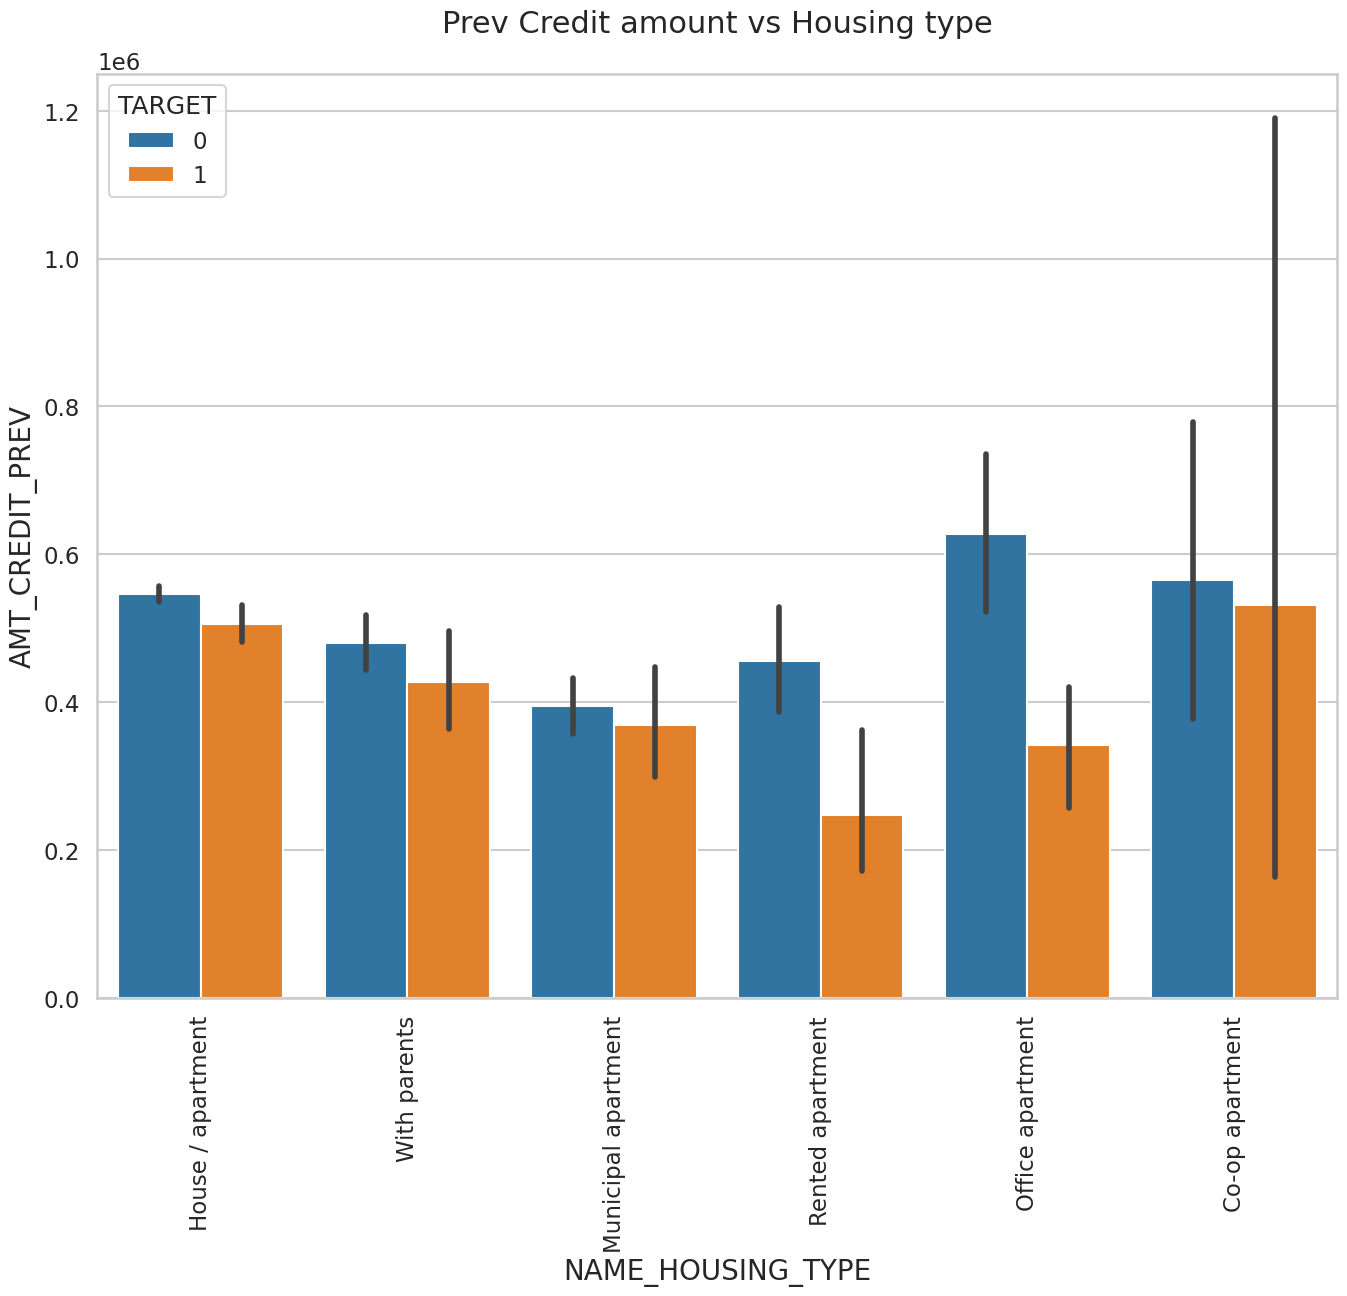

In [162]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.
So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

# CONCLUSION

**1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other
     than ‘Co-op apartment’ for successful payments.**

**2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.**

**3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.**

**4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.**
